In [1]:
from skimage import morphology as mo
import numpy as np
import matplotlib.pyplot as plt

from skimage.morphology import skeletonize , medial_axis
from skimage.util import invert
from scipy import ndimage as ndi
import cv2 as cv
import skimage as ski
from scipy.ndimage import uniform_filter

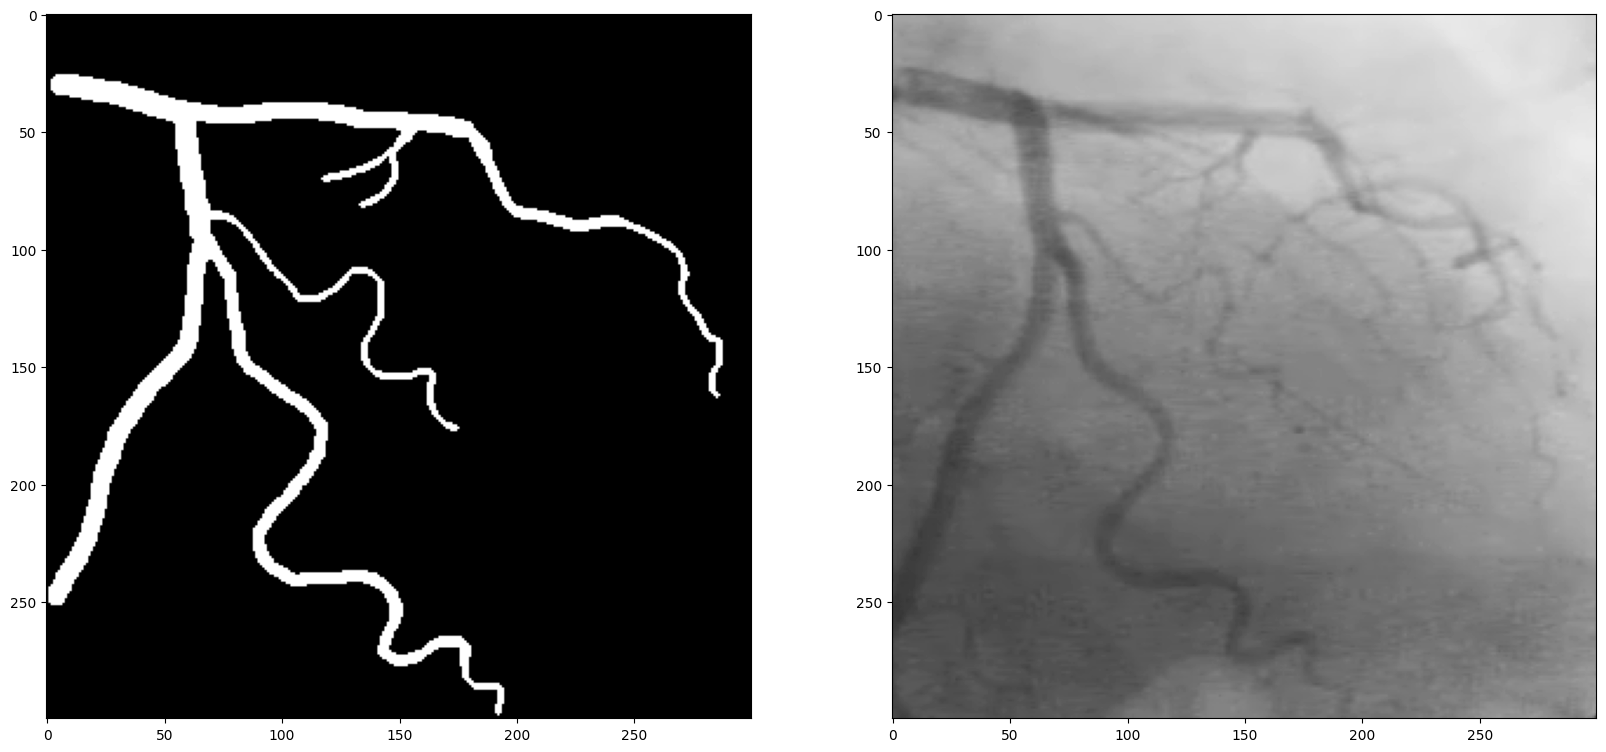

In [2]:
I = plt.imread('database/14.pgm')
I_2 = plt.imread('database/14_gt.pgm')
#I = I/255
#I_2 = I_2/255
#I = (ski.color.rgb2gray(I* 255)).astype(np.uint8)
#T = 
plt.figure(figsize=(20,20))
plt.subplot(1,2,1) 
plt.imshow(I_2,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Th(I, t):
    I = I.copy()  
    I[I < t] = 0
    I[I >= t] = 255
    return I

def ThRC(I, t=123):
    if t <= I.min() or t >= I.max():
        t = np.mean([I.min(), I.max()])  # Corregido el cálculo de t inicial

    tm = t + 1
    i = 0
    while abs(tm - t) > 1e-6 and i < 9:  # Corregida la condición de parada
        B = I[I < t]
        F = I[I > t]
        
        # Evitar división por cero si B o F están vacíos
        mB = np.mean(B) if B.size > 0 else 0
        mF = np.mean(F) if F.size > 0 else 255
        
        tm = t
        t = (mB + mF) / 2
        i += 1

    return Th(I, t), t, i  # Asegurar que se devuelve la imagen binarizada

def ThLocal(I, h, w):
    h //= 2
    w //= 2
    H, W = I.shape
    Th = np.full((H, W), 100, dtype=np.uint8)  
    I2 = np.zeros((H, W), dtype=np.uint8)

    for i in range(H):
        for j in range(W):
            i_min, i_max = max(0, i - h), min(H, i + h + 1)
            j_min, j_max = max(0, j - w), min(W, j + w + 1)
            
            Iw = I[i_min:i_max, j_min:j_max]

            if Iw.size == 0:
                continue

            _, Th[i, j], _ = ThRC(Iw)  # Corregido para ignorar la imagen binarizada
            I2[i, j] = 255 if I[i, j] > Th[i, j] else 0  # Corregido el umbral binario

    return I2, Th

def ThSauvola(I,w = 12 , k= 0.5, R=128):
    I = I.astype(np.float32)
    
    mu = uniform_filter(I, w, mode='reflect')
    
    mu_sq = uniform_filter(I**2, w, mode='reflect')
    s = np.sqrt(mu_sq - mu**2)

    Th = mu * (1 + k * ((s / R) - 1))
    return (I> Th).astype(np.uint8)*255, Th
    

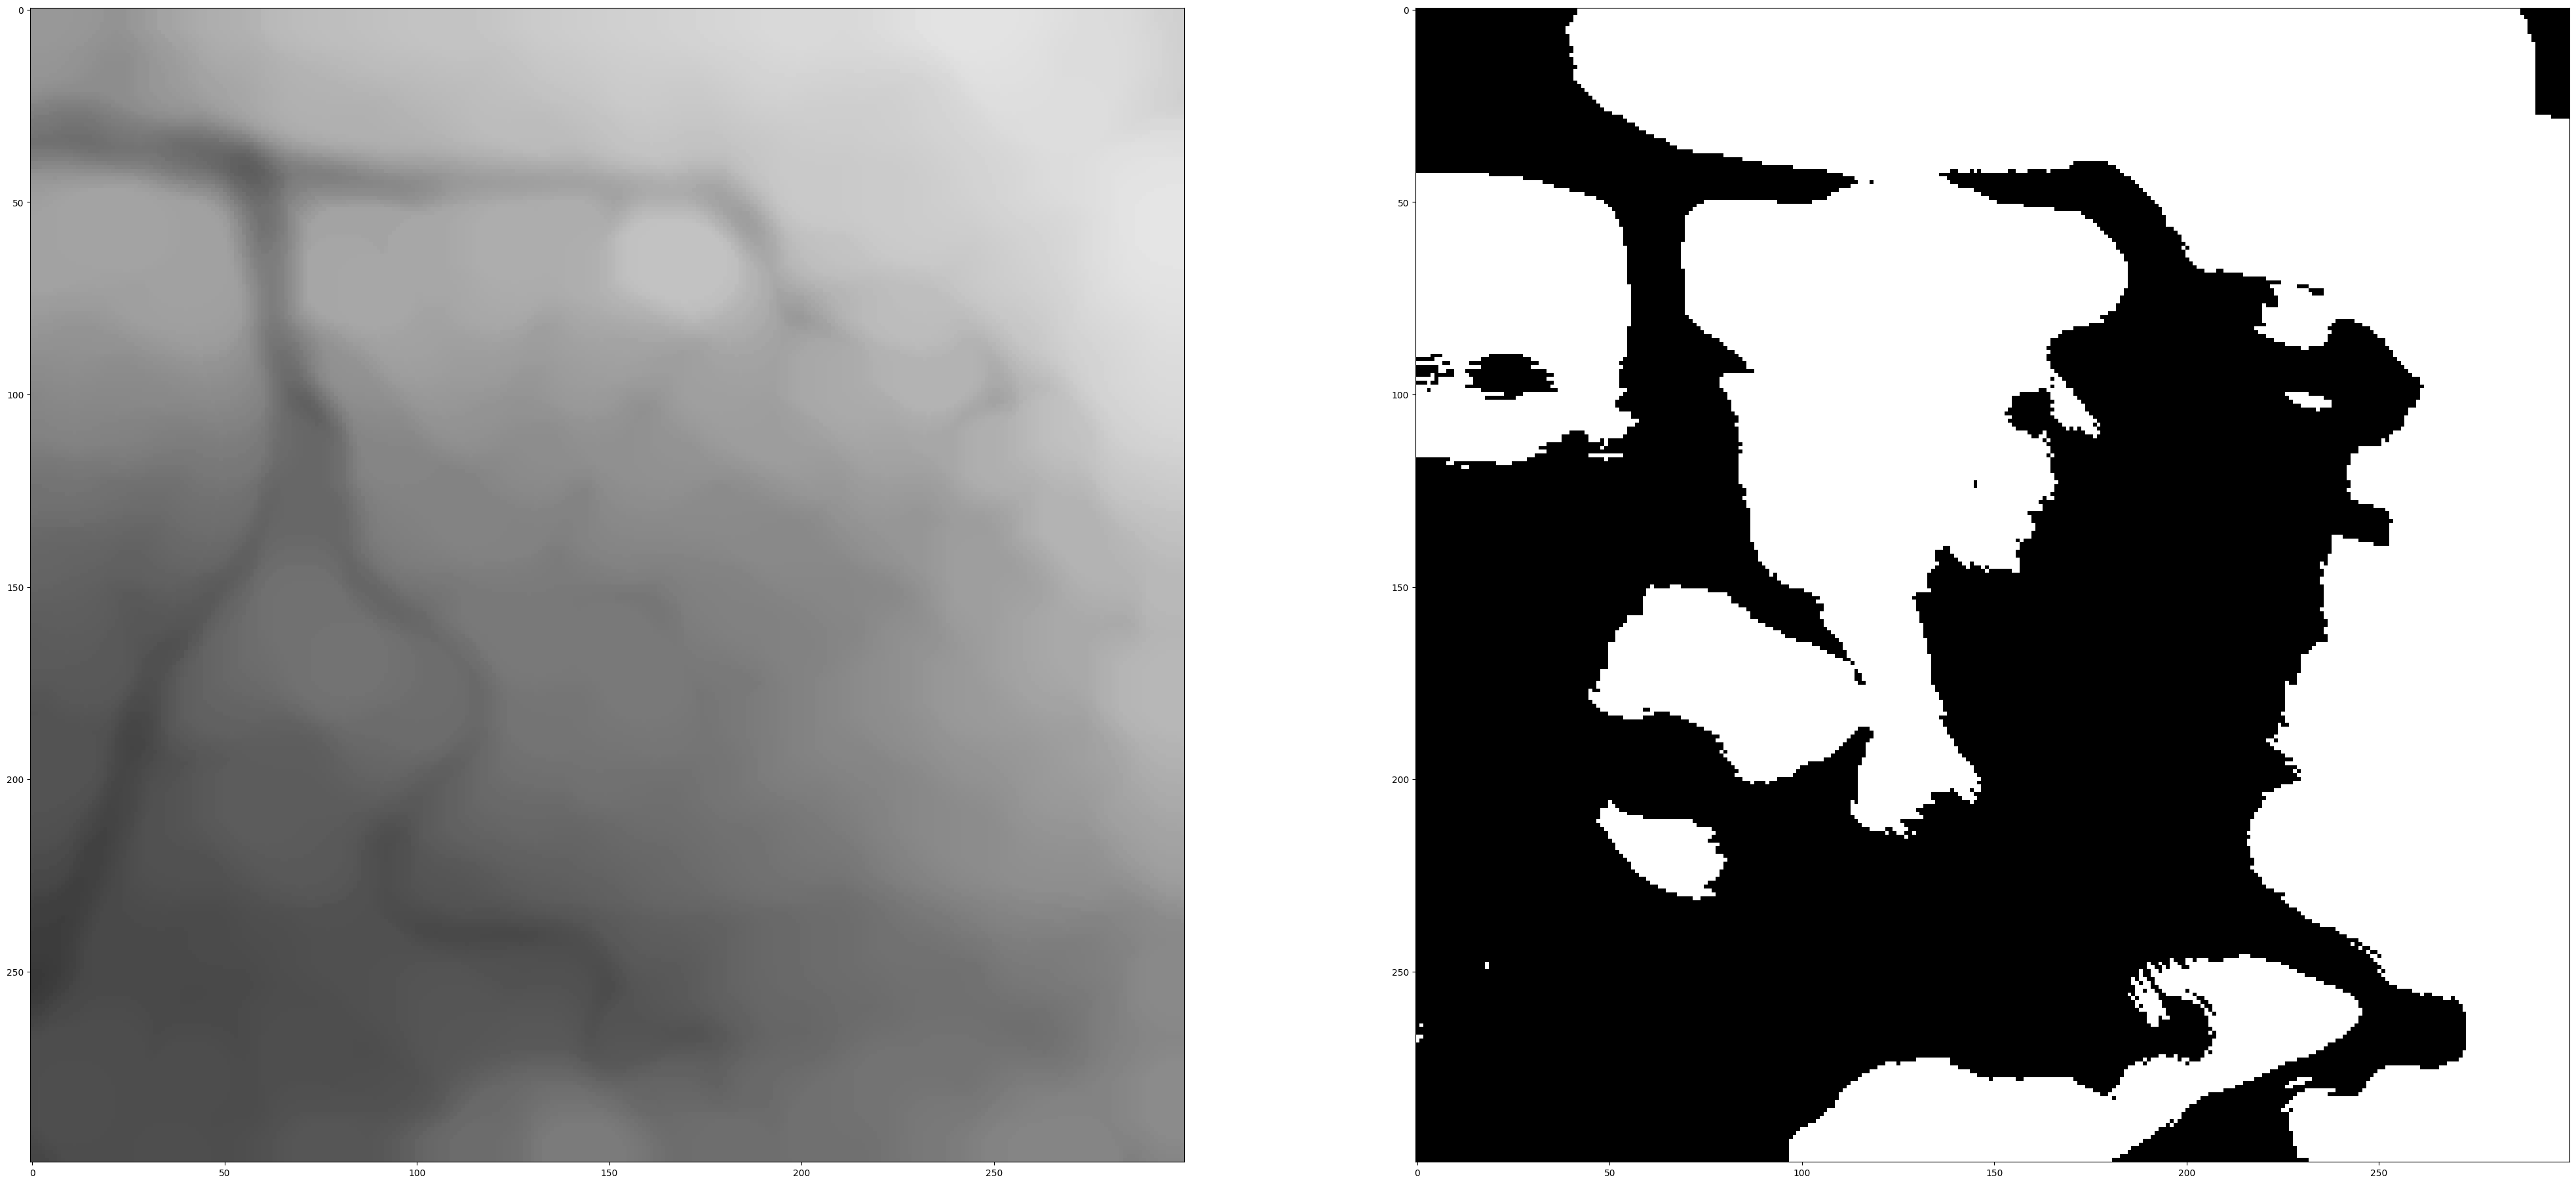

In [23]:
I = plt.imread('database/14.pgm')
S = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
#T = cv.morphologyEx(I,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
d = 5
f = np.array(([0,  -1 ,  0],  
            [-1  , 5 , -1 ] ,
            [0,  -1 ,  0]),dtype="int" ) 

#I = cv.GaussianBlur(I,(21,21),0)

I = cv.GaussianBlur(I,(21,21),0)
I = cv.filter2D(I,-1,f)
I = cv.morphologyEx(I,cv.MORPH_OPEN,S) #HACE EL TRABAJO mejor despues de un afilado

#T = cv.filter2D(T,-1,f)
T, t  = ThLocal(I, 50,200)
#T ,i ,ii = ThRC(I)
#T = cv.morphologyEx(I,cv.MORPH_BLACKHAT,S) #HACE EL TRABAJO PERO CON MUCHO RUIDO
#T = ThSauvola(I)#ski.exposure.equalize_hist(I, nbins=256, mask=None)
plt.figure(figsize=(50,50))
plt.subplot(1,2,1) 
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)                                 
plt.imshow(T,cmap='gray', vmin=0, vmax=255)
plt.show()

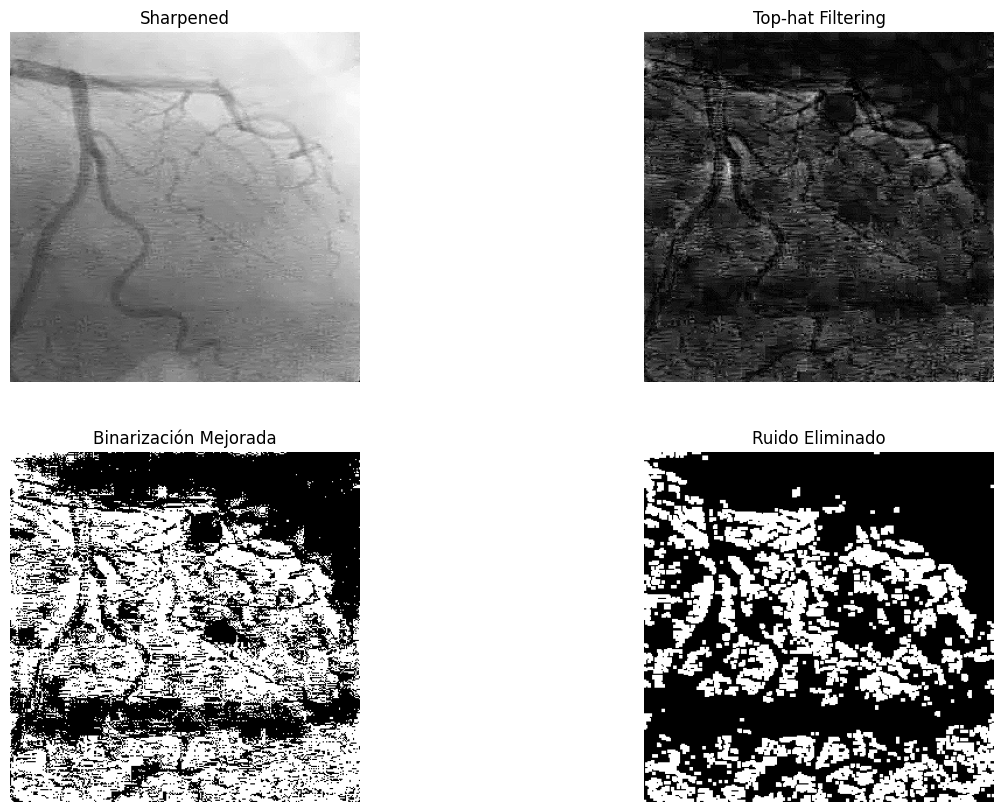

'/mnt/data/processed_image.pgm'

In [80]:
image = 
# Aplicar un filtro de sharpening (afilado) usando un kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]], dtype=np.float32)

sharpened = cv2.filter2D(image, -1, sharpening_kernel)

# Aplicar un filtro top-hat (estructura brillante sobre fondo oscuro)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
tophat = cv2.morphologyEx(sharpened, cv2.MORPH_TOPHAT, kernel)

# Mejorar el contraste utilizando ecualización de histograma
contrast_enhanced = cv2.equalizeHist(tophat)

# Aplicar una binarización con Otsu para separar blancos y negros
_, binary_enhanced = cv2.threshold(contrast_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Eliminar ruido con una operación de apertura morfológica
denoised = cv2.morphologyEx(binary_enhanced, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# Mostrar los resultados intermedios y finales
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(tophat, cmap='gray')
plt.title("Top-hat Filtering")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(binary_enhanced, cmap='gray')
plt.title("Binarización Mejorada")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(denoised, cmap='gray')
plt.title("Ruido Eliminado")
plt.axis("off")

plt.show()

# Guardar la imagen final
processed_image_path = "/mnt/data/processed_image.pgm"
cv2.imwrite(processed_image_path, denoised)
processed_image_path


In [12]:
S1 = np.array((
        [ 0,-1, 0],
        [ 1, 1, 1],
        [-1, 1,-1]), dtype="int")
S2 = np.array((
        [0, -1, 1],
        [1, 1, -1],
        [-1, 1, 0]), dtype="int")

S3 = np.array((
        [ 0,-1, 1],
        [ 1, 1,-1],
        [ 0,-1, 1]), dtype="int") 
S4 = np.array((
        [-1,-1, 1],
        [-1, 1,-1],
        [ 1,-1, 1]), dtype="int") 
S1f = np.array((
        [-1,-1,-1],
        [ 1, 1,-1],
        [-1,-1,-1]), dtype="int")
S2f = np.array((
        [-1,-1, 1],
        [-1, 1,-1],
        [-1,-1,-1]), dtype="int")
S1t = np.array((
        [1,-1, 1],
        [0, 1, 0],
        [1, 0, 1]), dtype="int")
S2t = np.array((
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]), dtype="int")
S3t = np.array((
        [0, 1, 0],
        [0, 1, 1],
        [1, 1, 0],
        [0, 1, 0]), dtype="int")
S4t = np.array((
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [0, 0 ,1, 0]), dtype="int")
S5t = np.array((
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 1],
        [0, 1, 0]), dtype="int")





def detector(I,S):
    I = I.astype(np.uint8)
    H = I[:,:] *0
    for i in range(4):
        S = np.rot90(S)
        H = H + cv.morphologyEx(I, cv.MORPH_HITMISS, S)
    return H
        

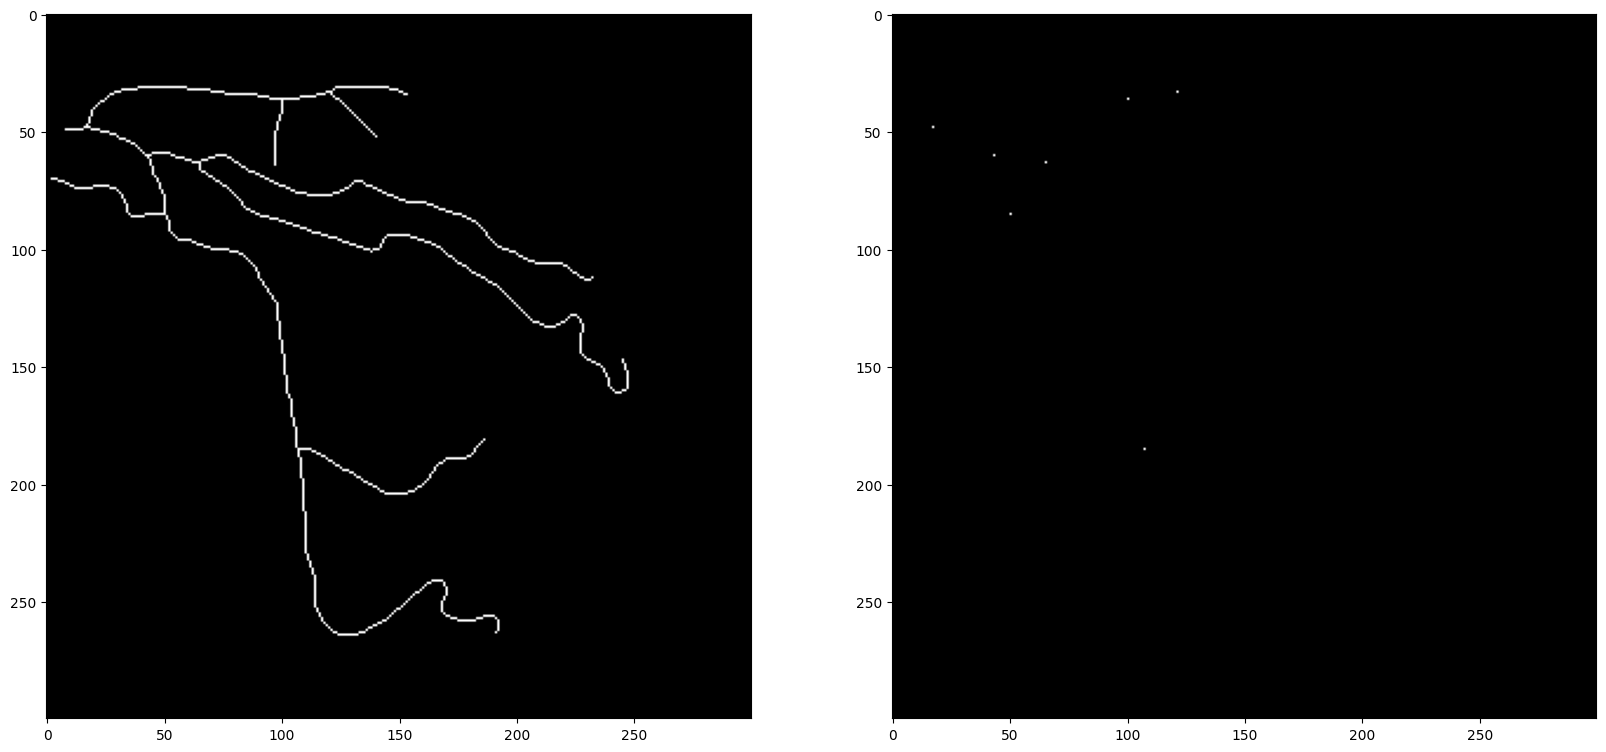

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
H = detector(T,S1) + detector(T,S2) + detector(T,S3) + detector(T, S4)
se3  = mo.rectangle(3,3)
#H = mo.dilation(H, se3)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1) 
plt.imshow(T,cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)                                 
plt.imshow(H,cmap='gray', vmin=0, vmax=1)
plt.show()
print(H)

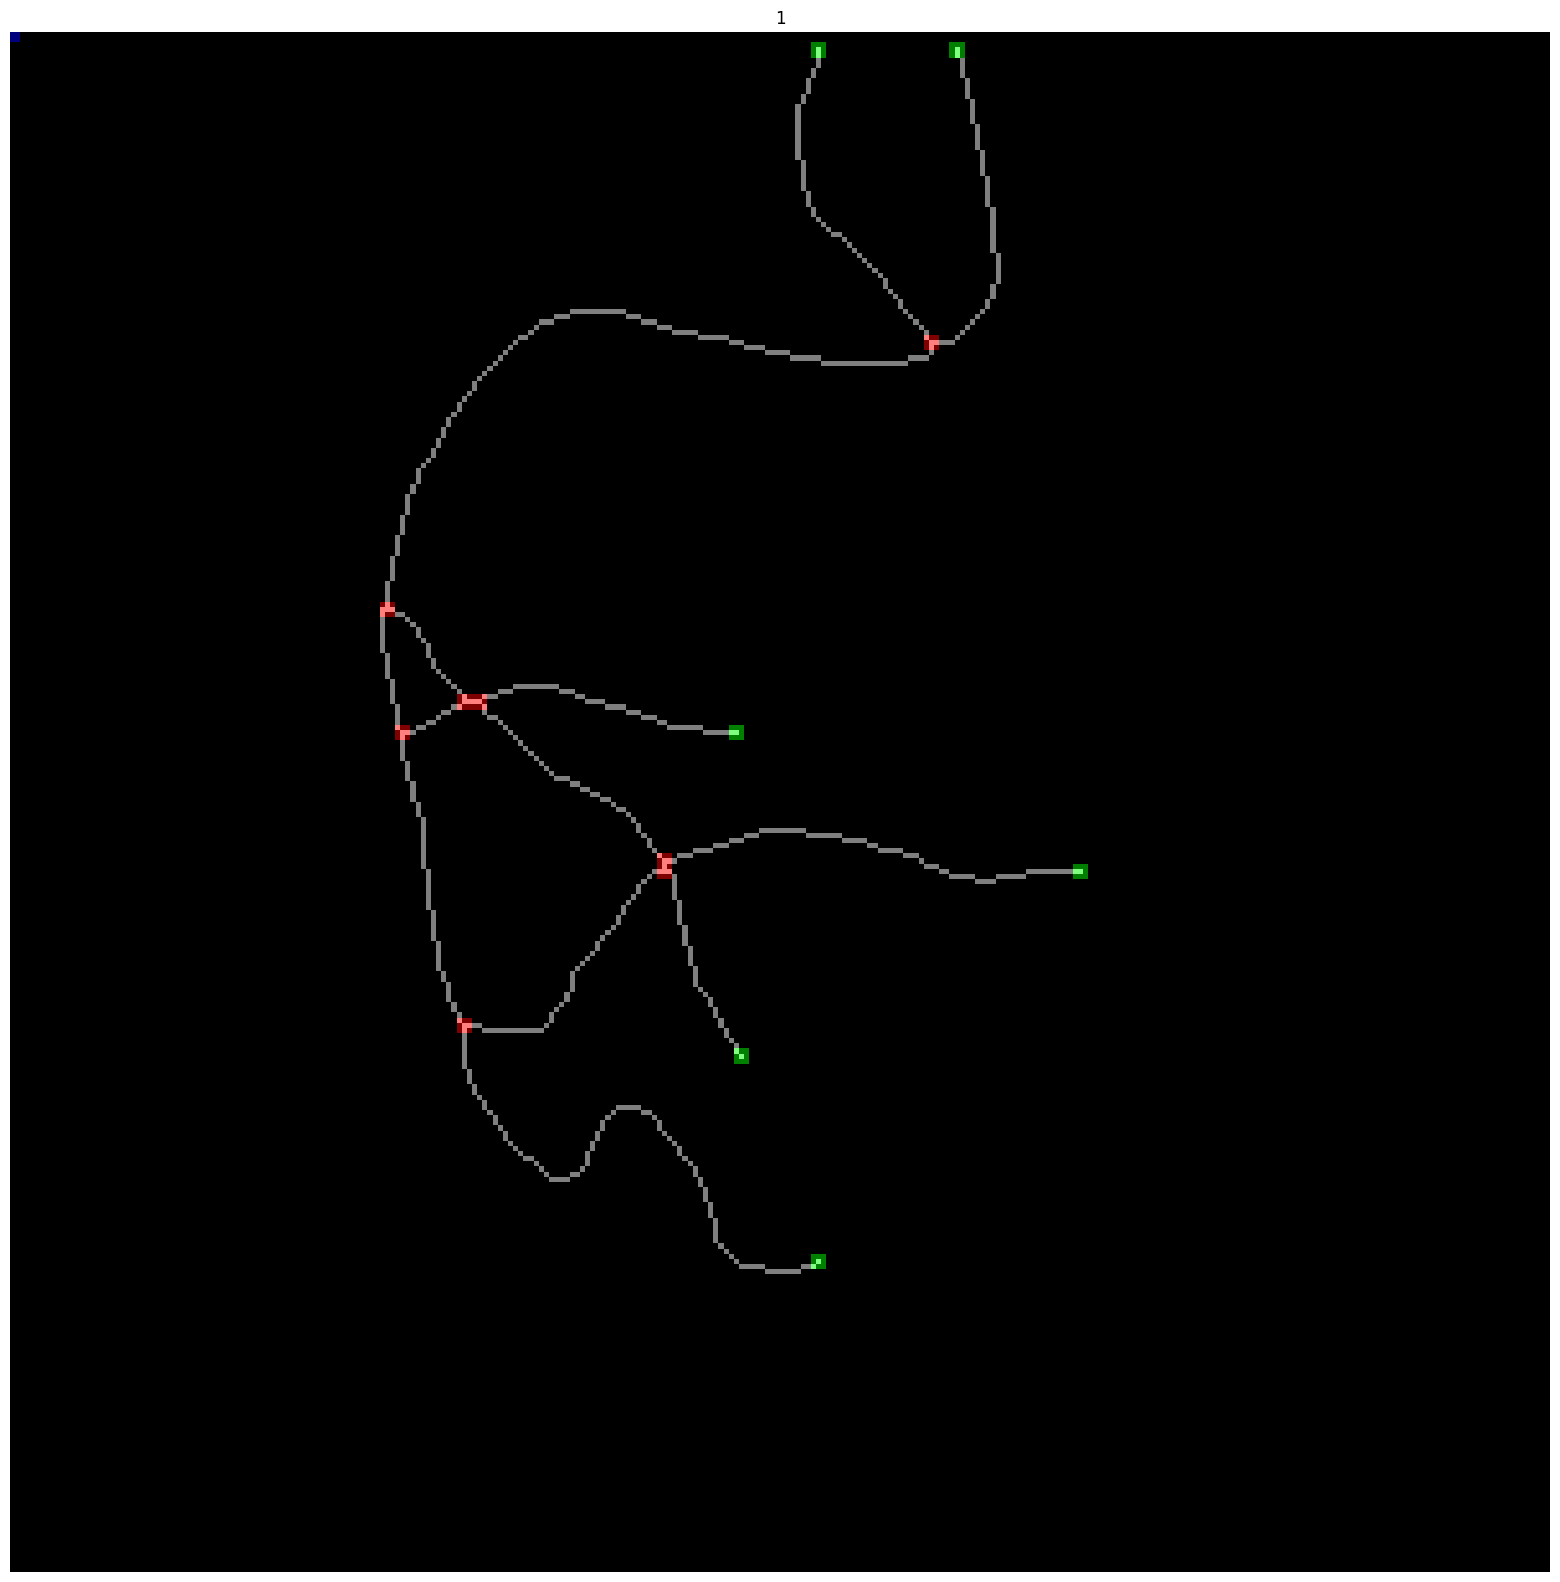

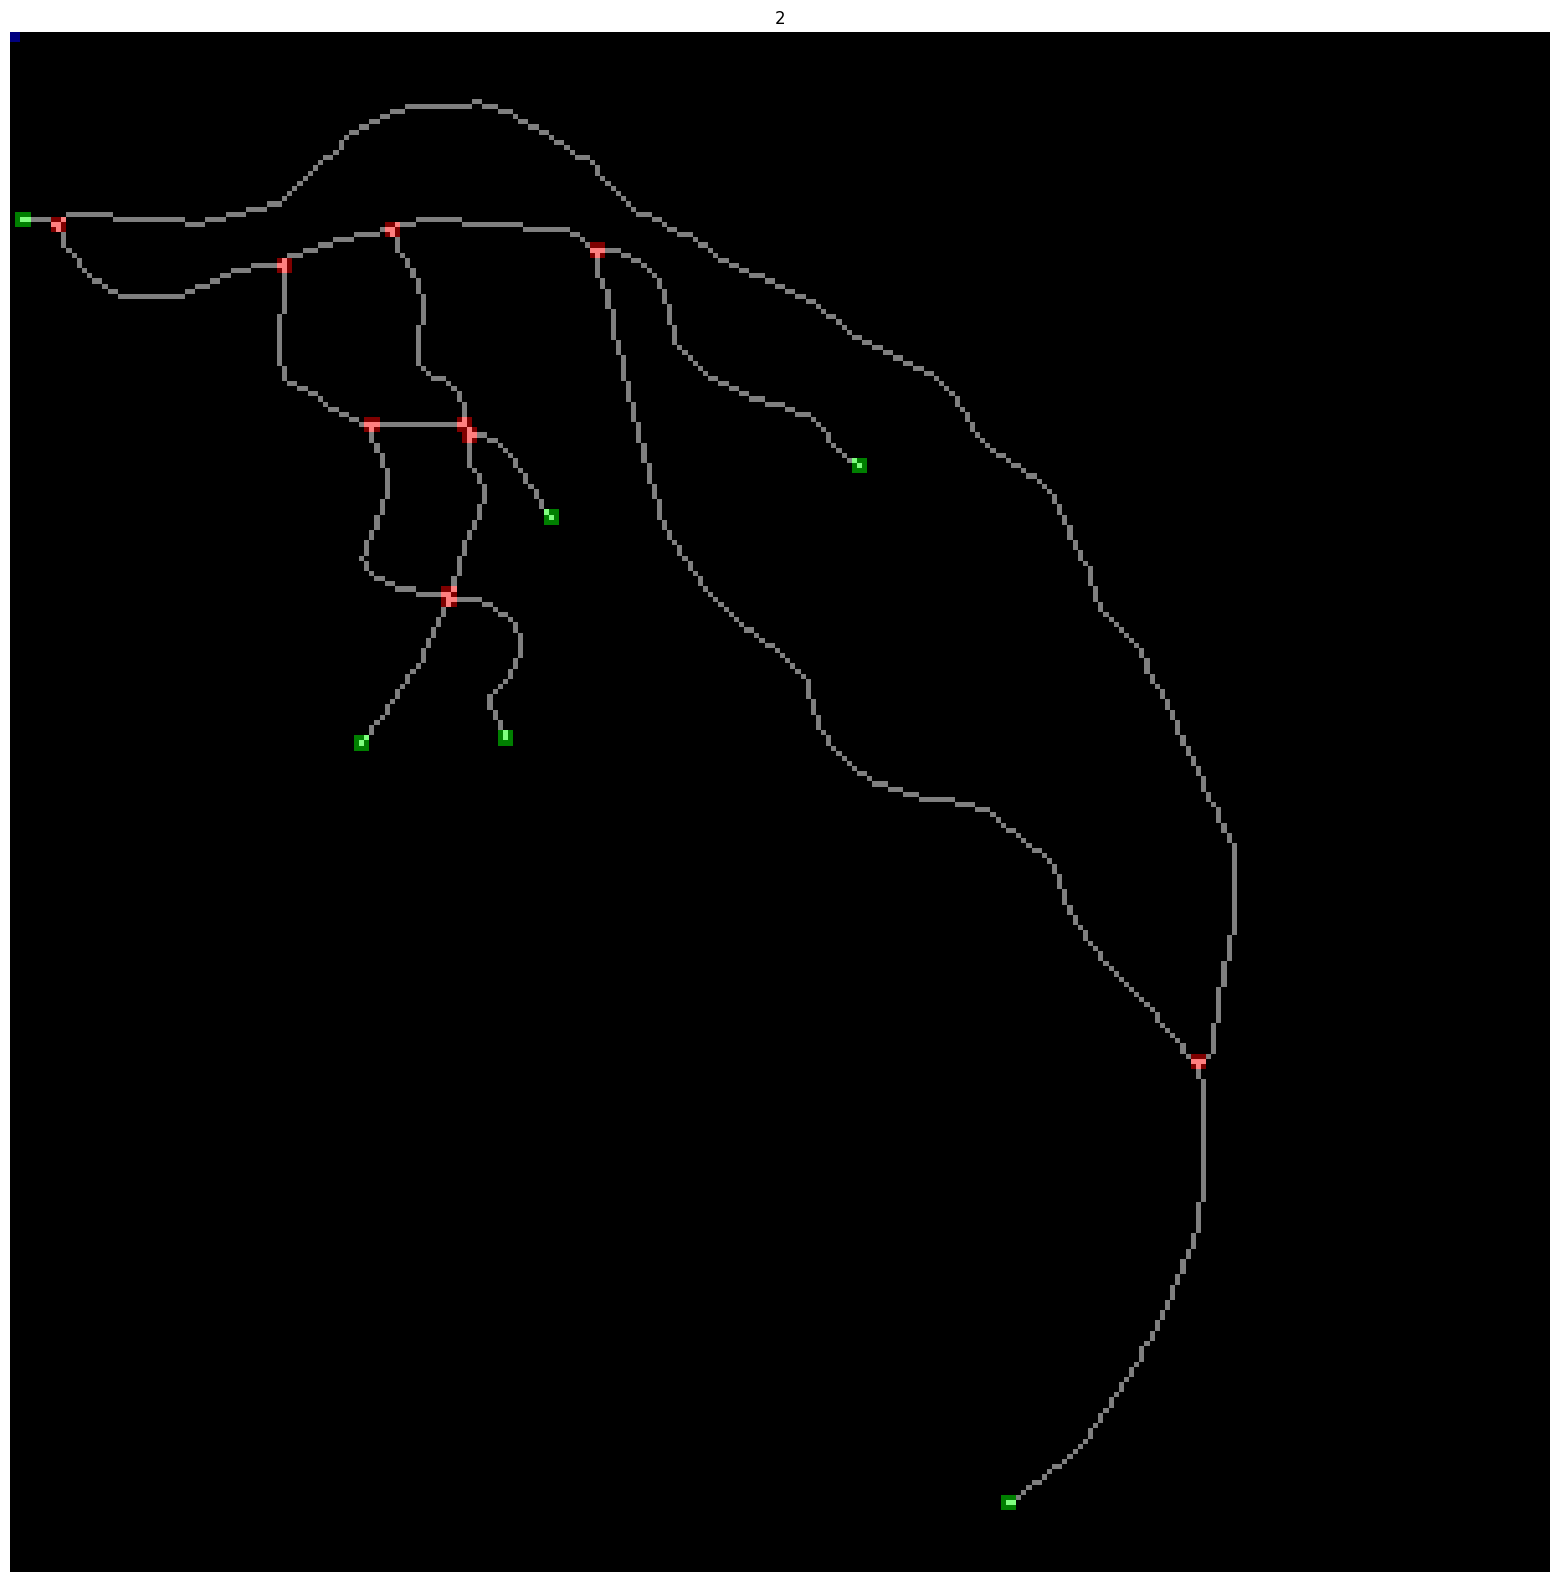

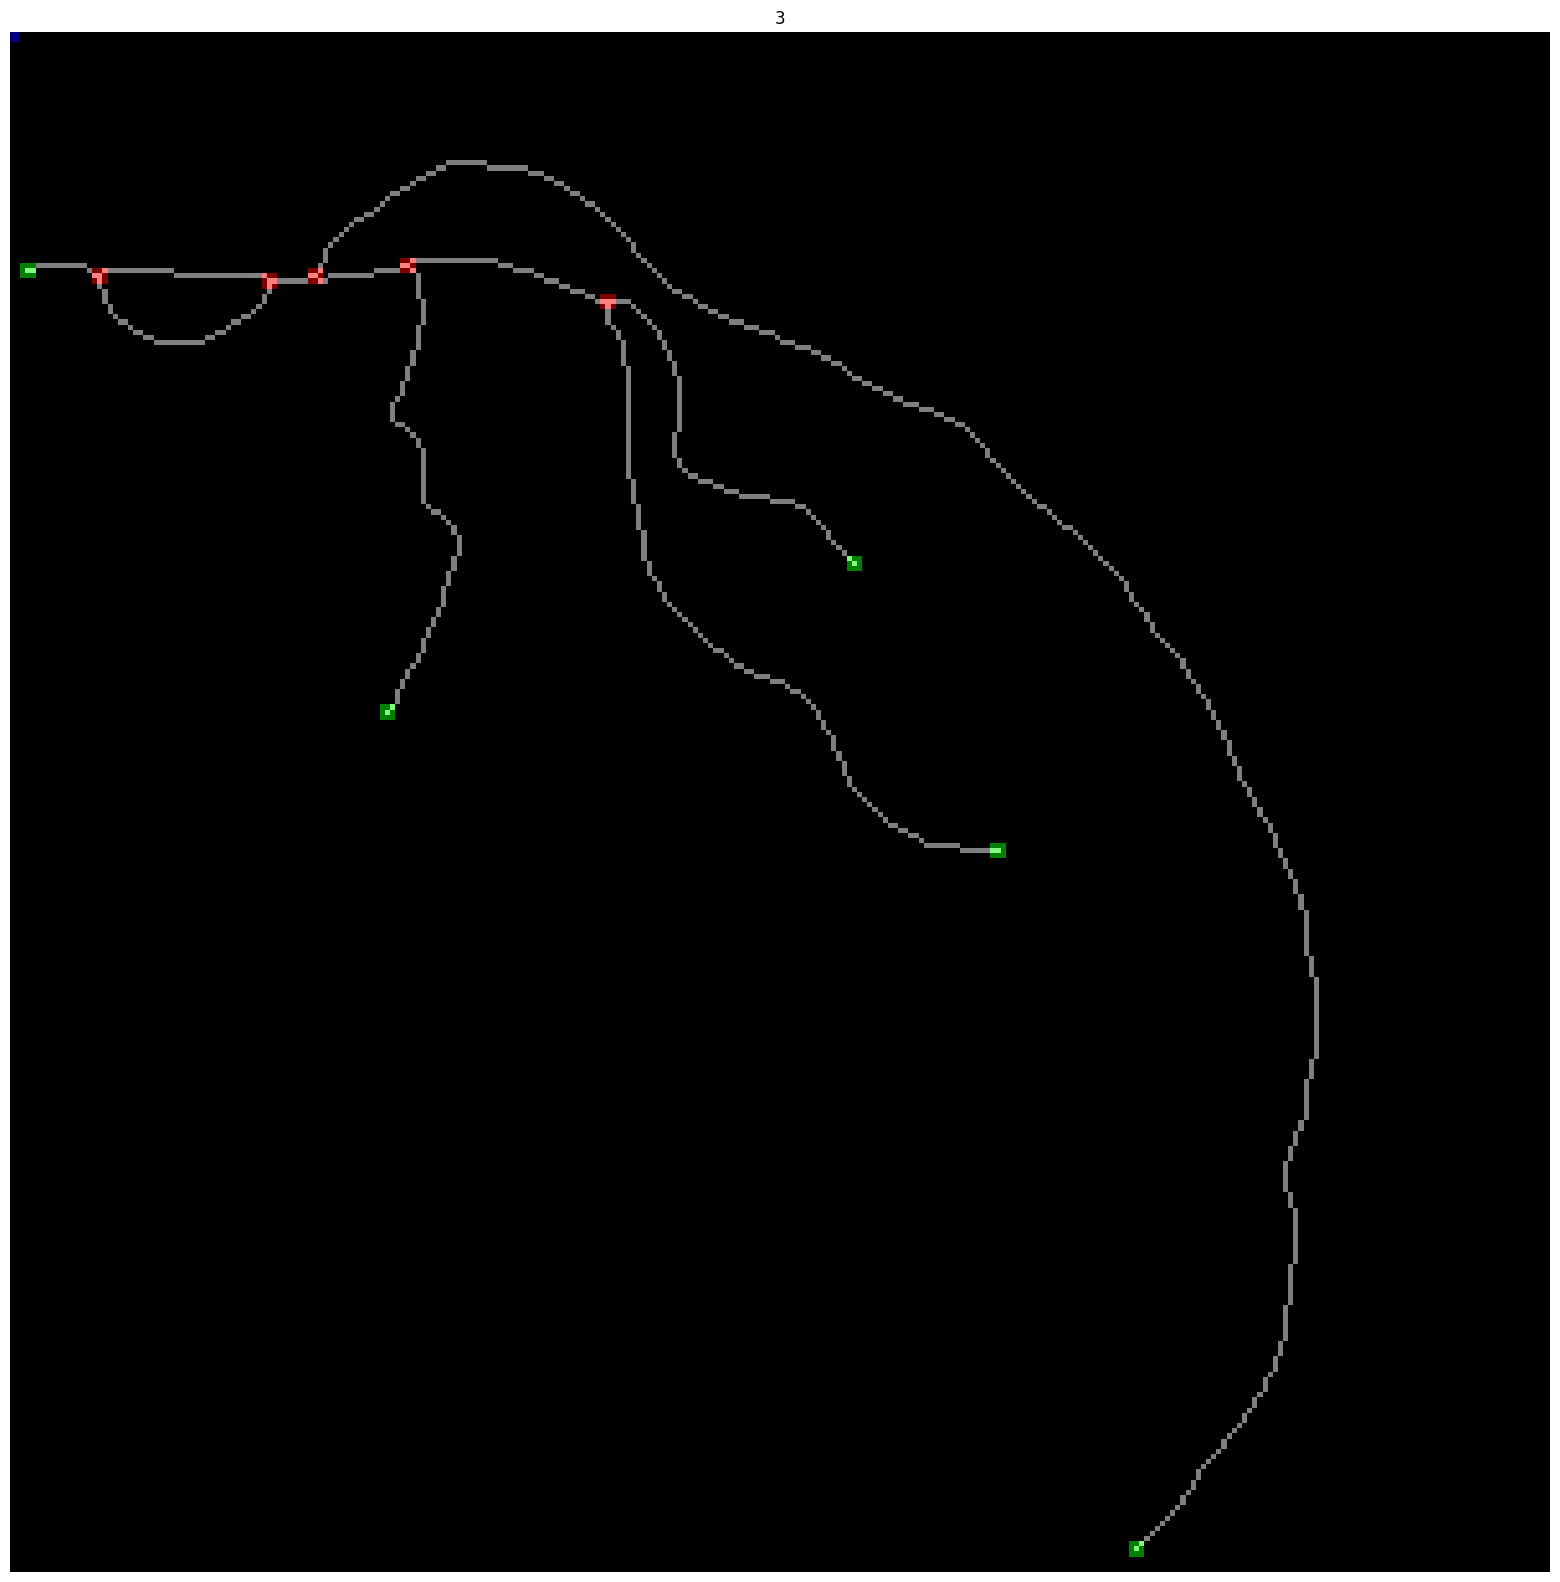

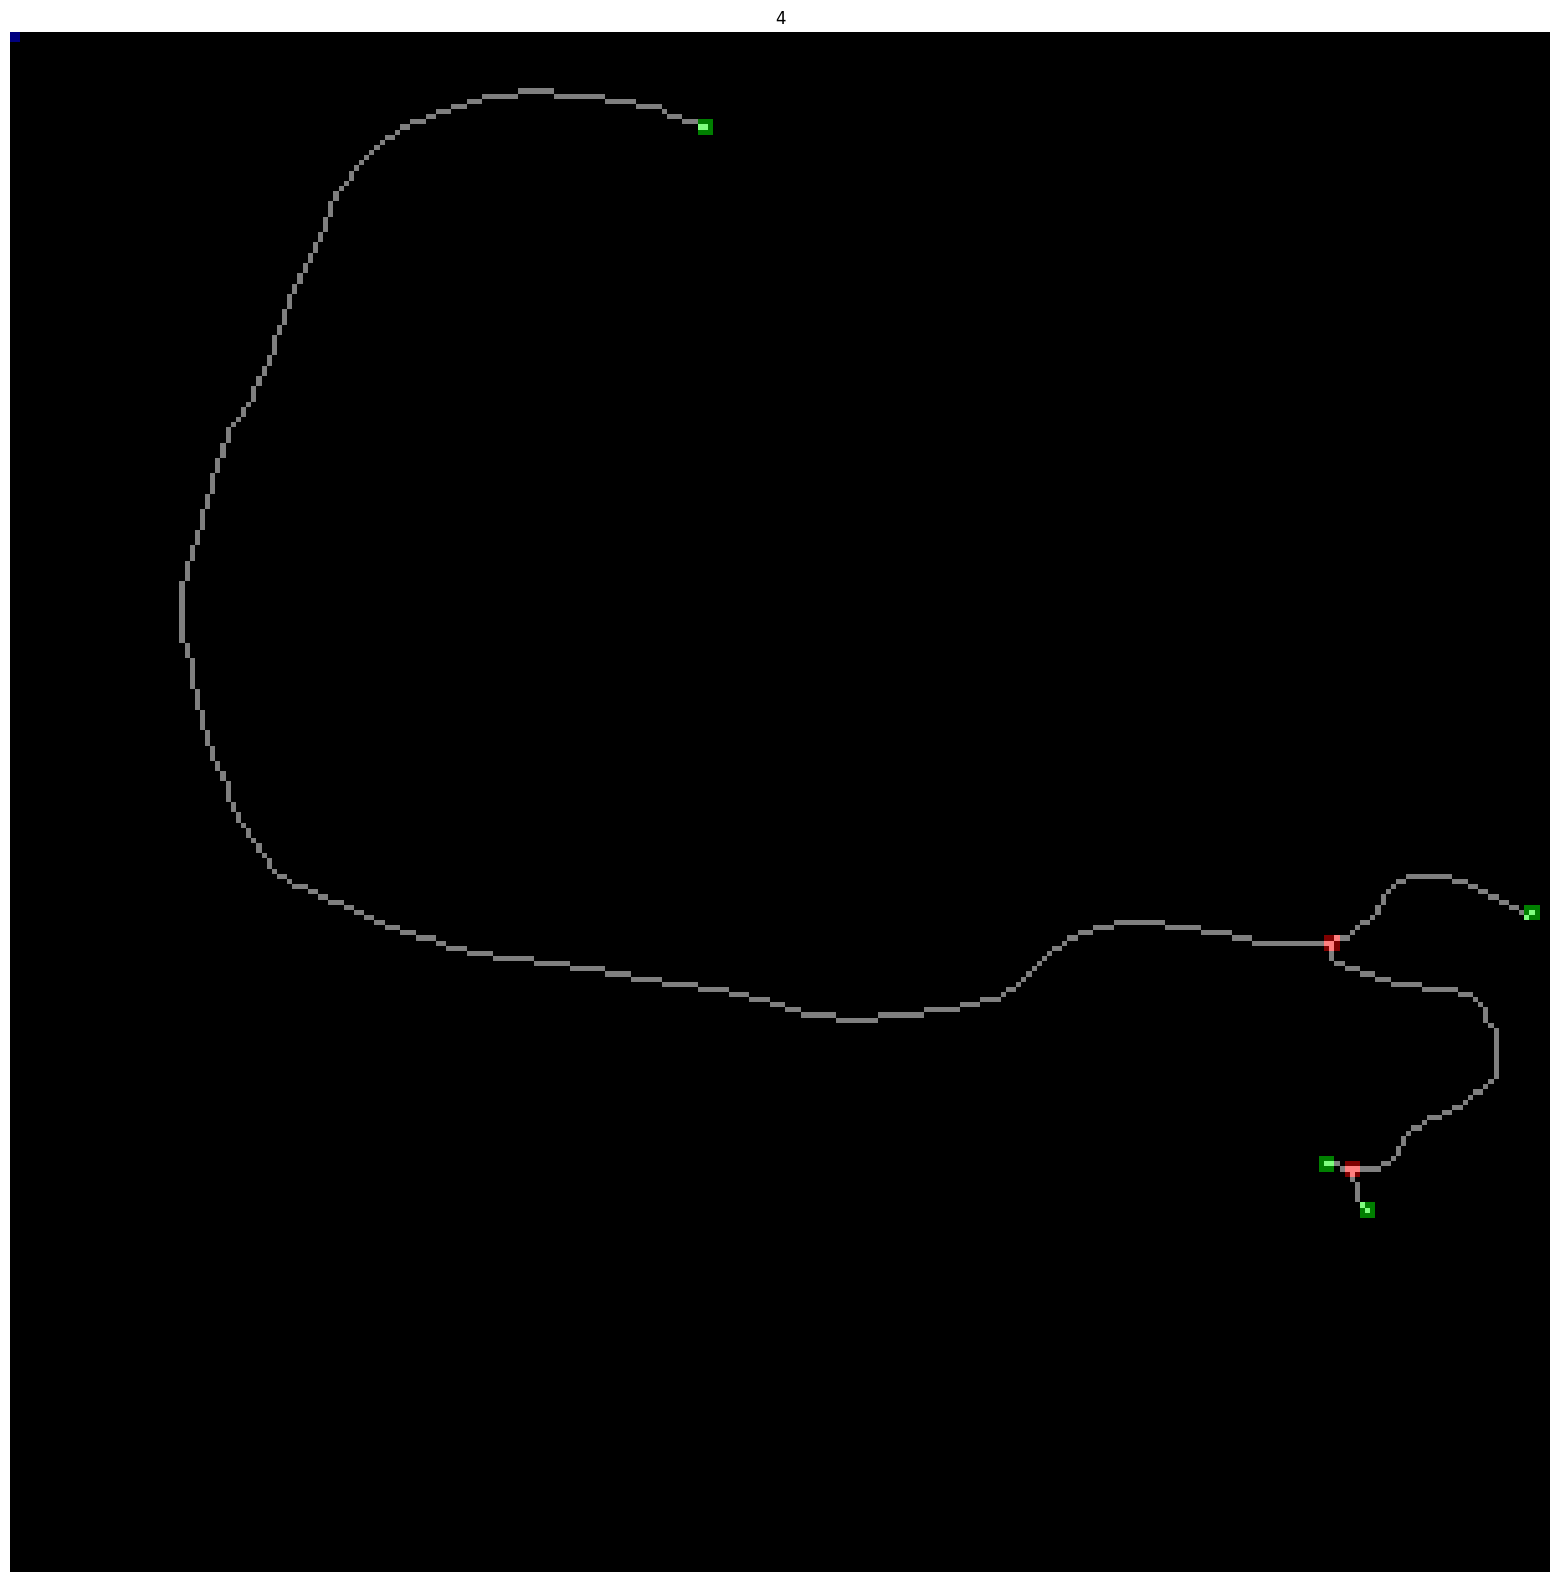

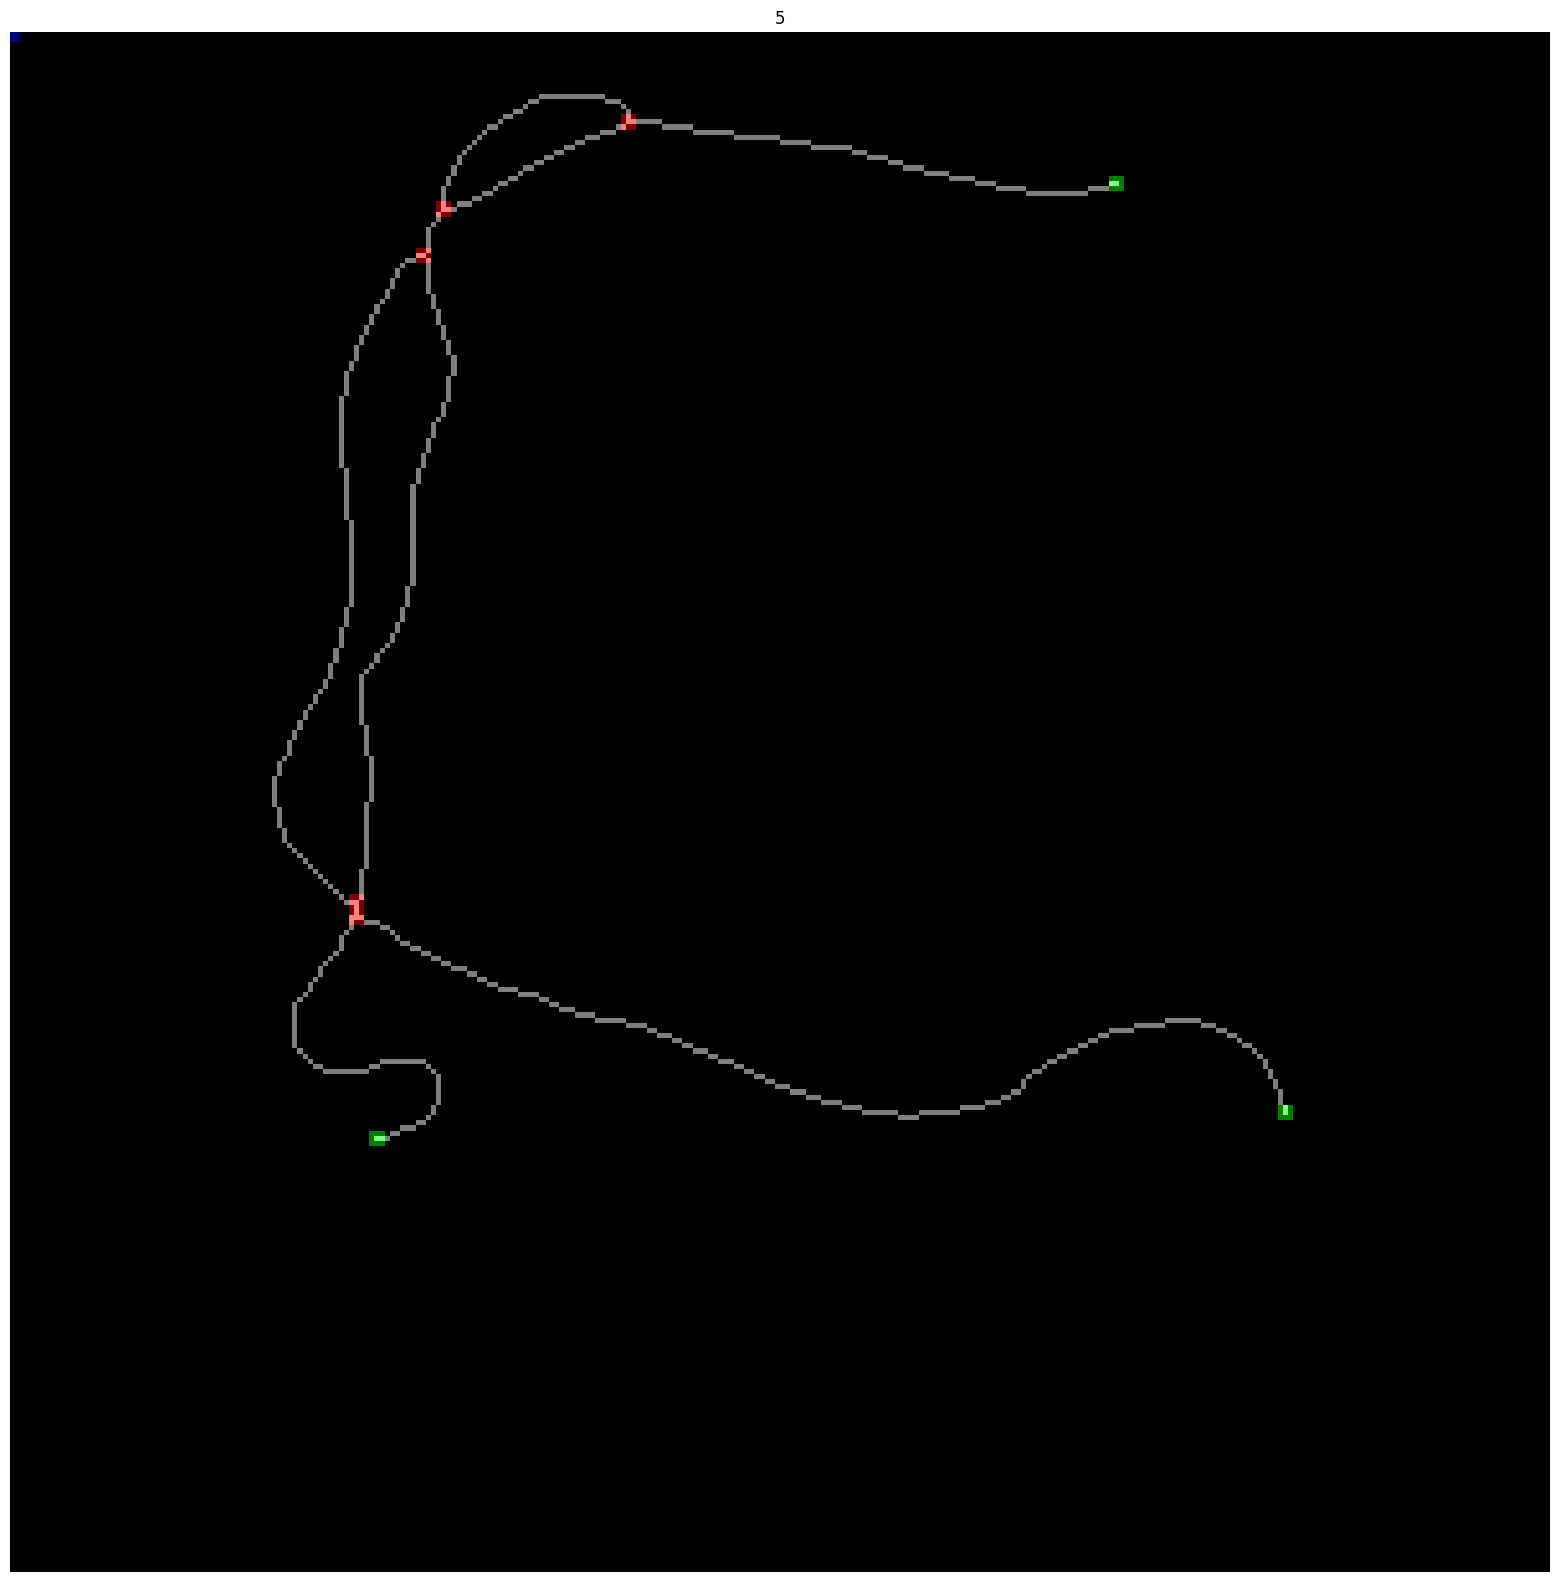

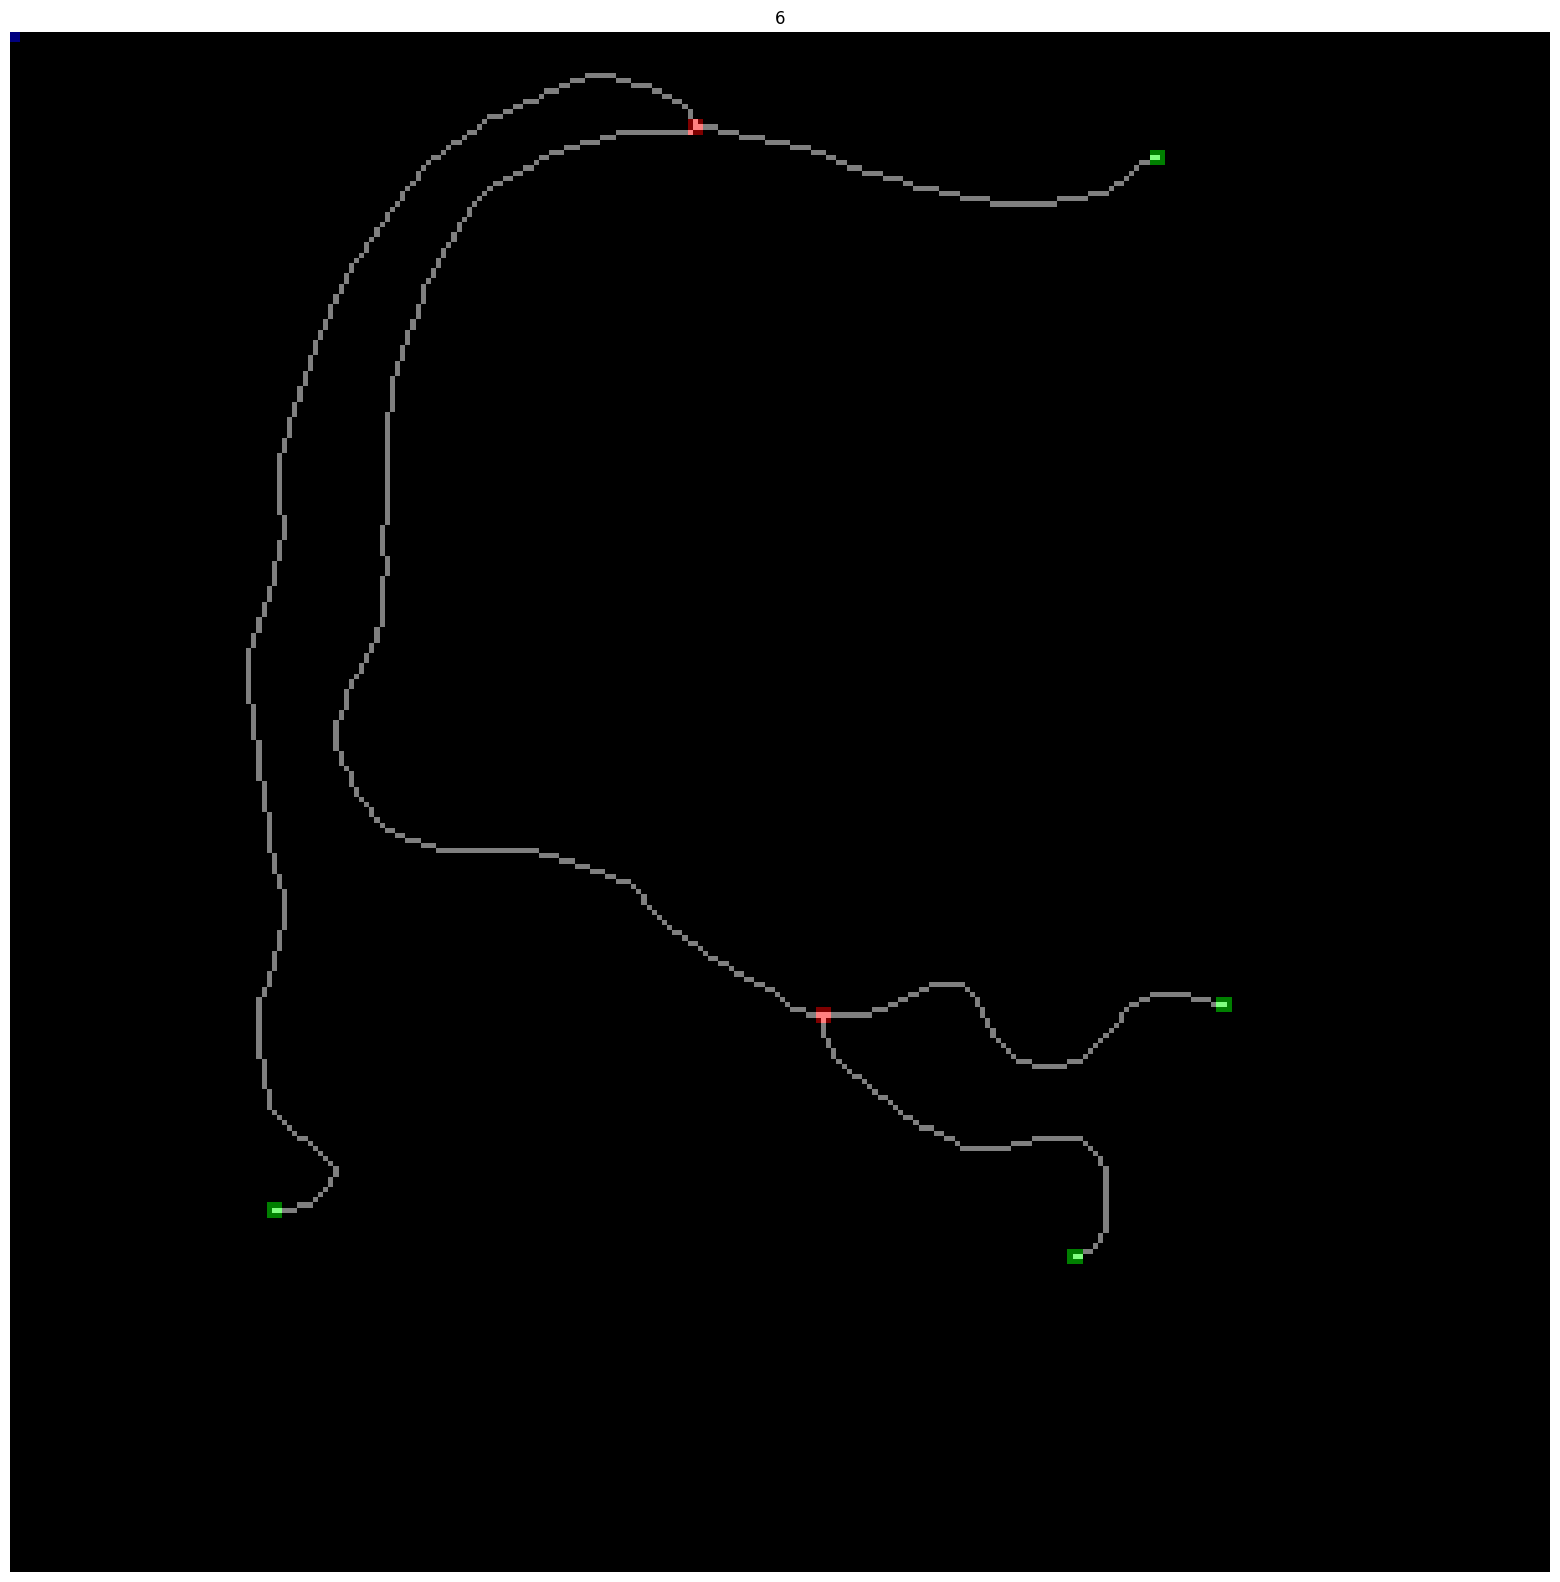

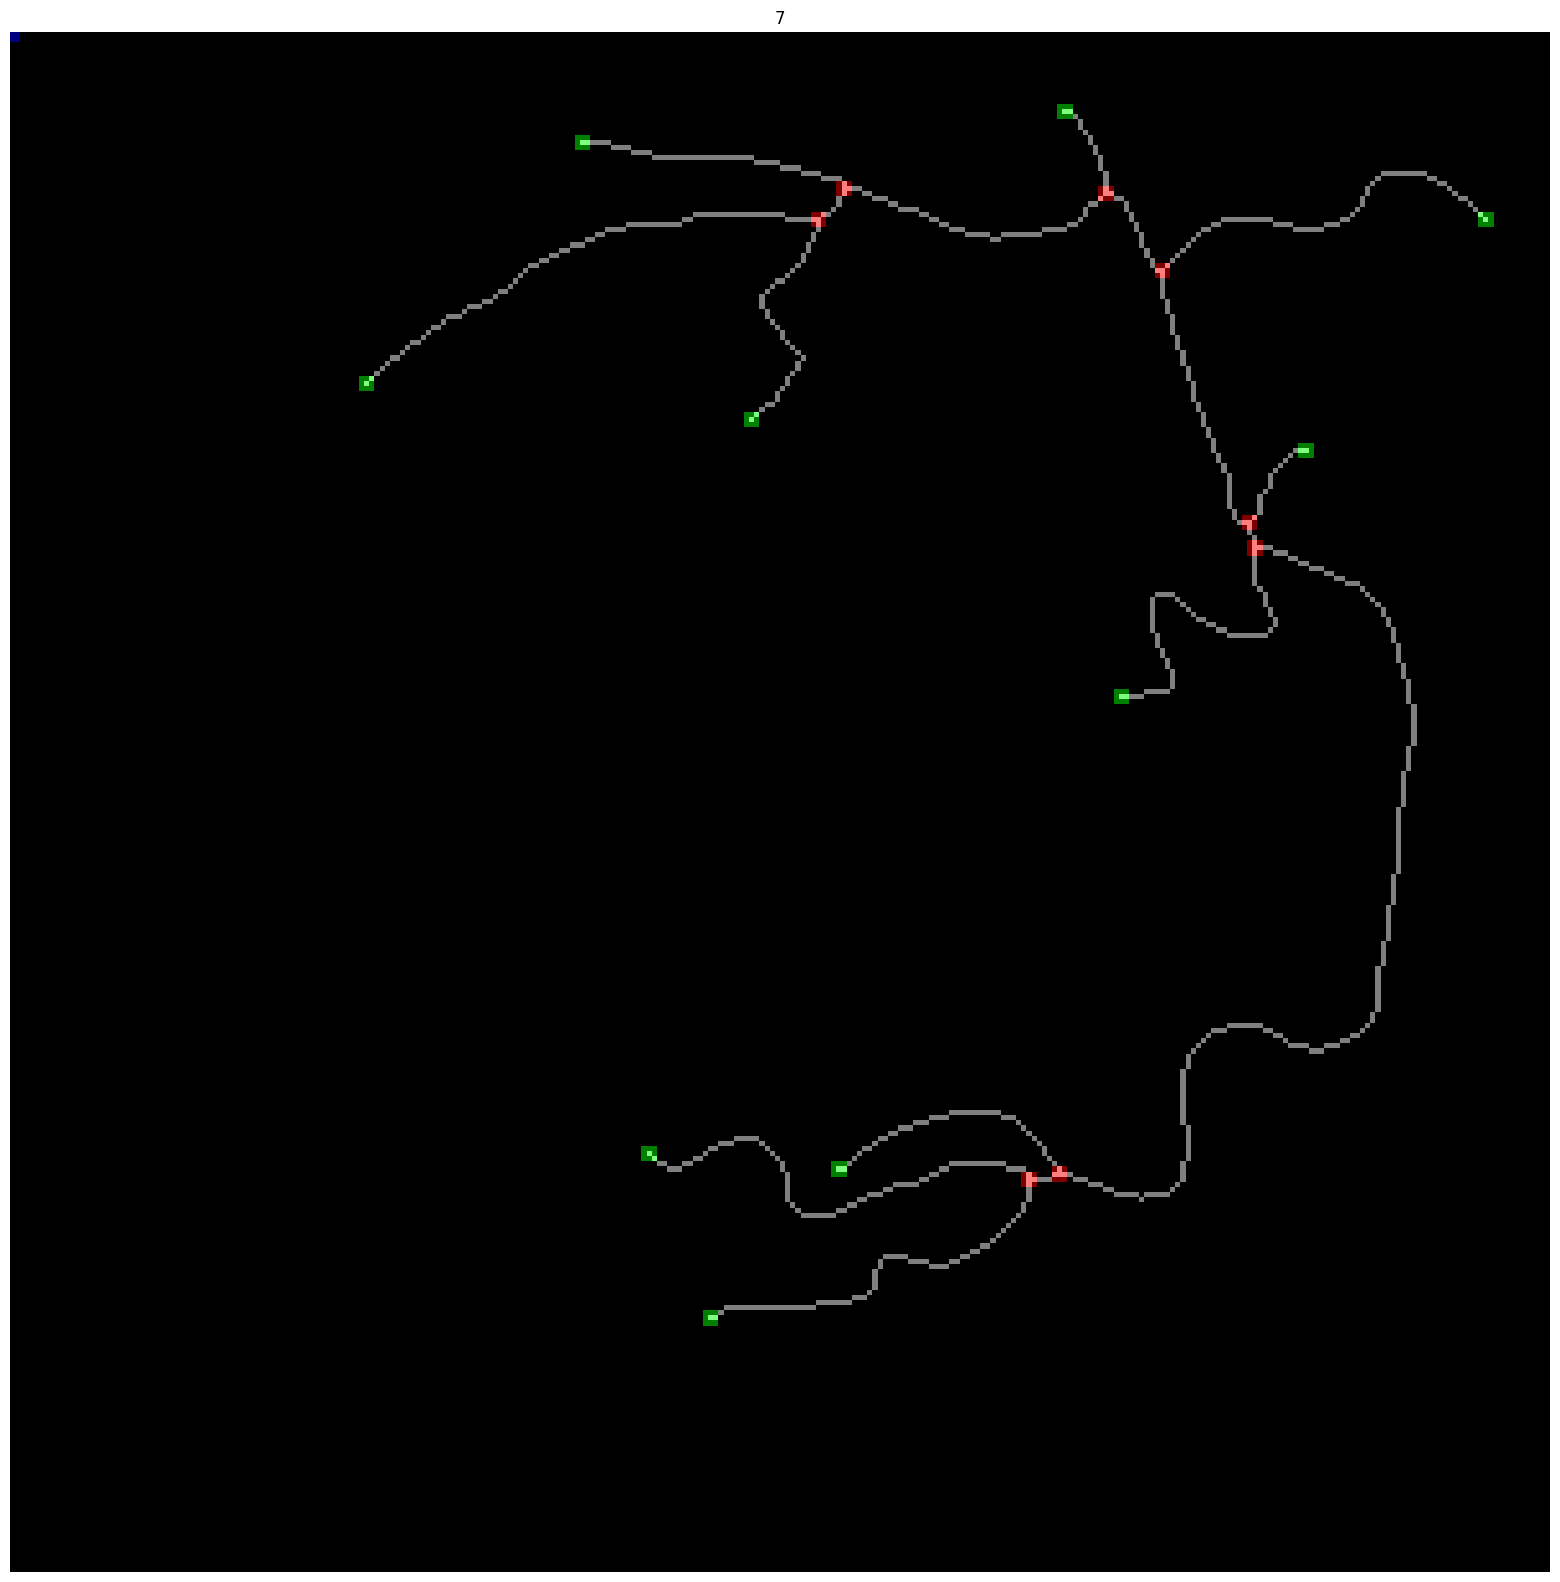

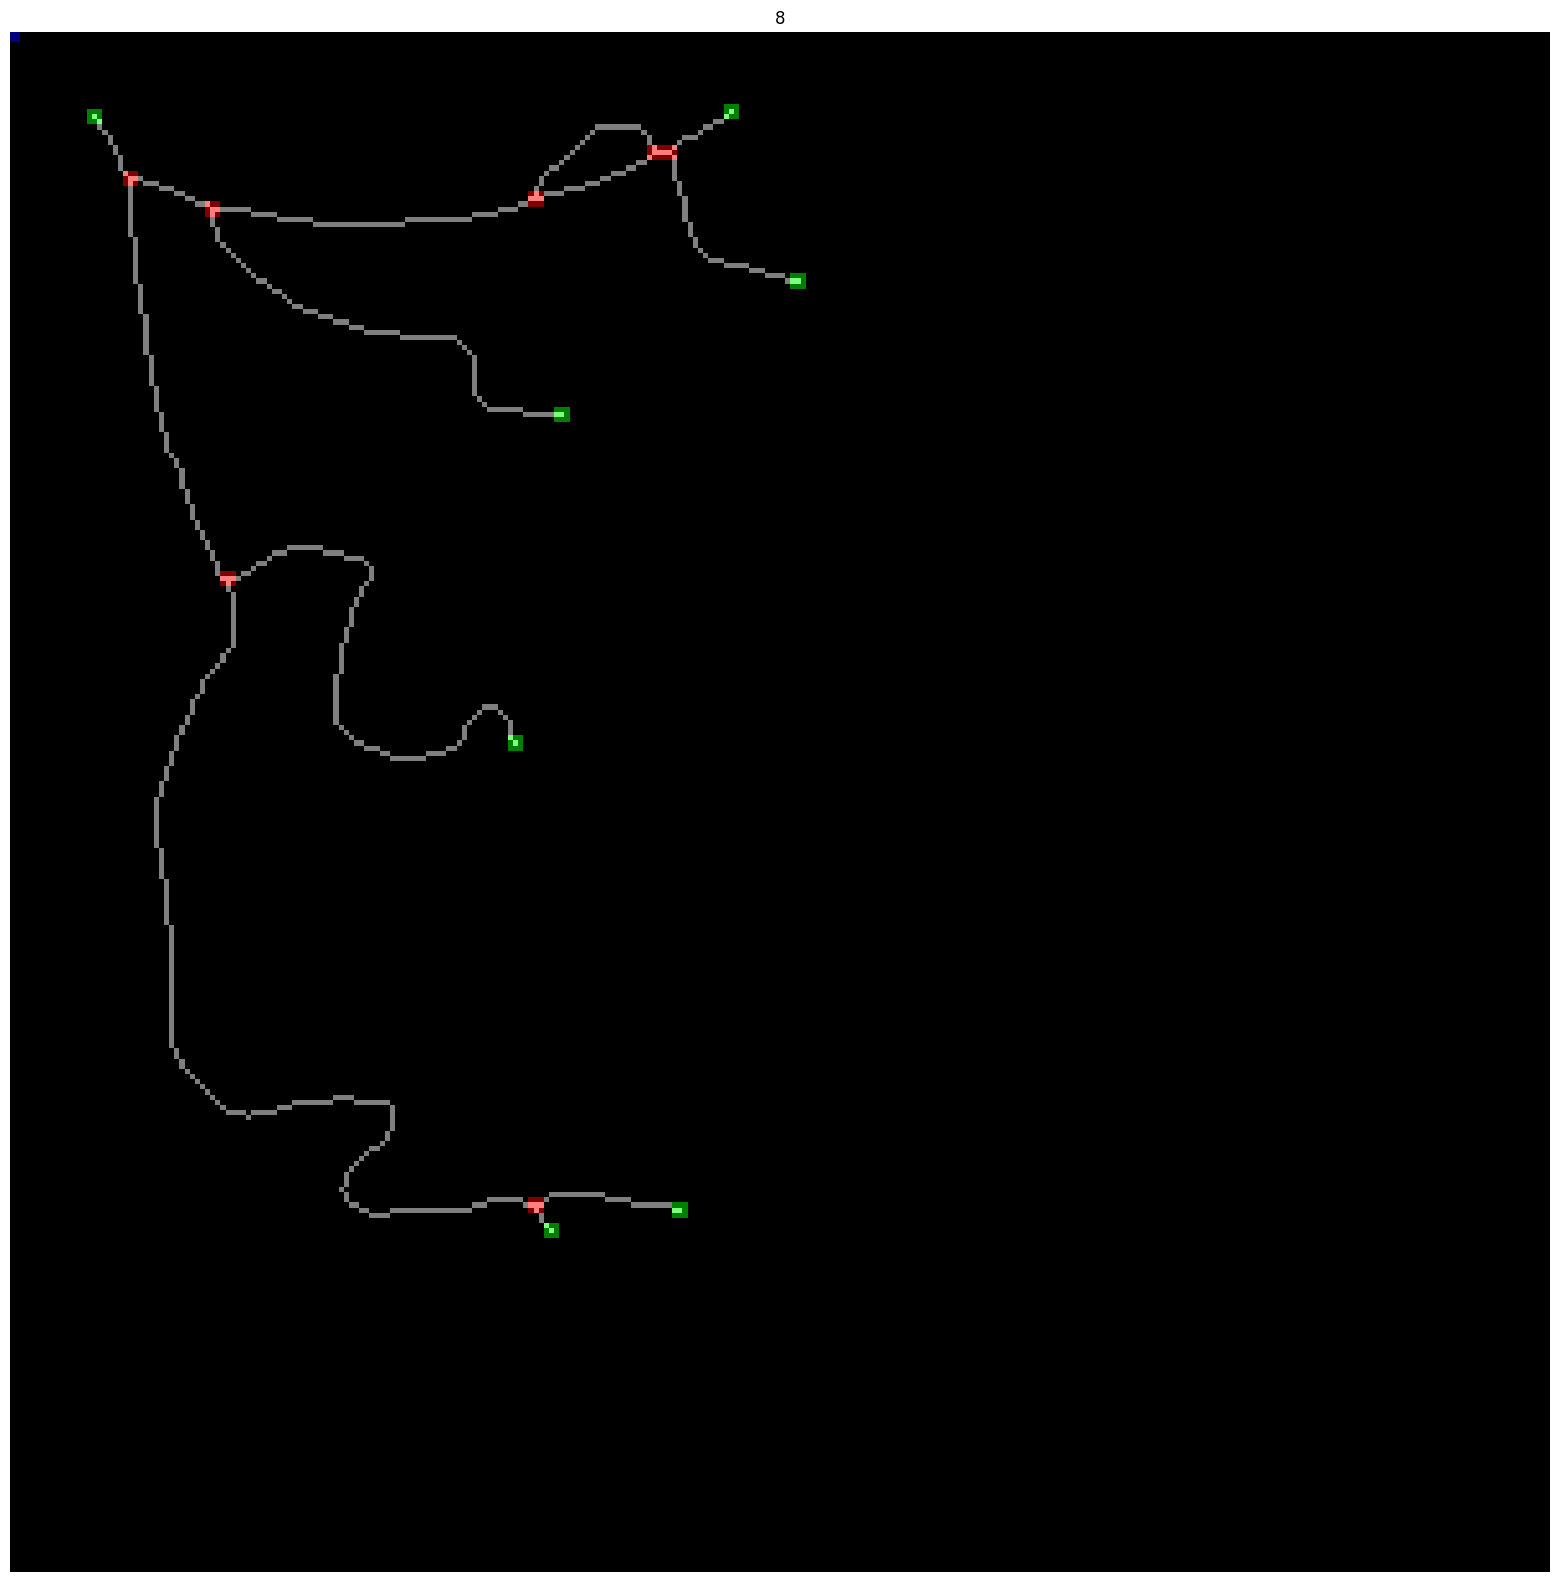

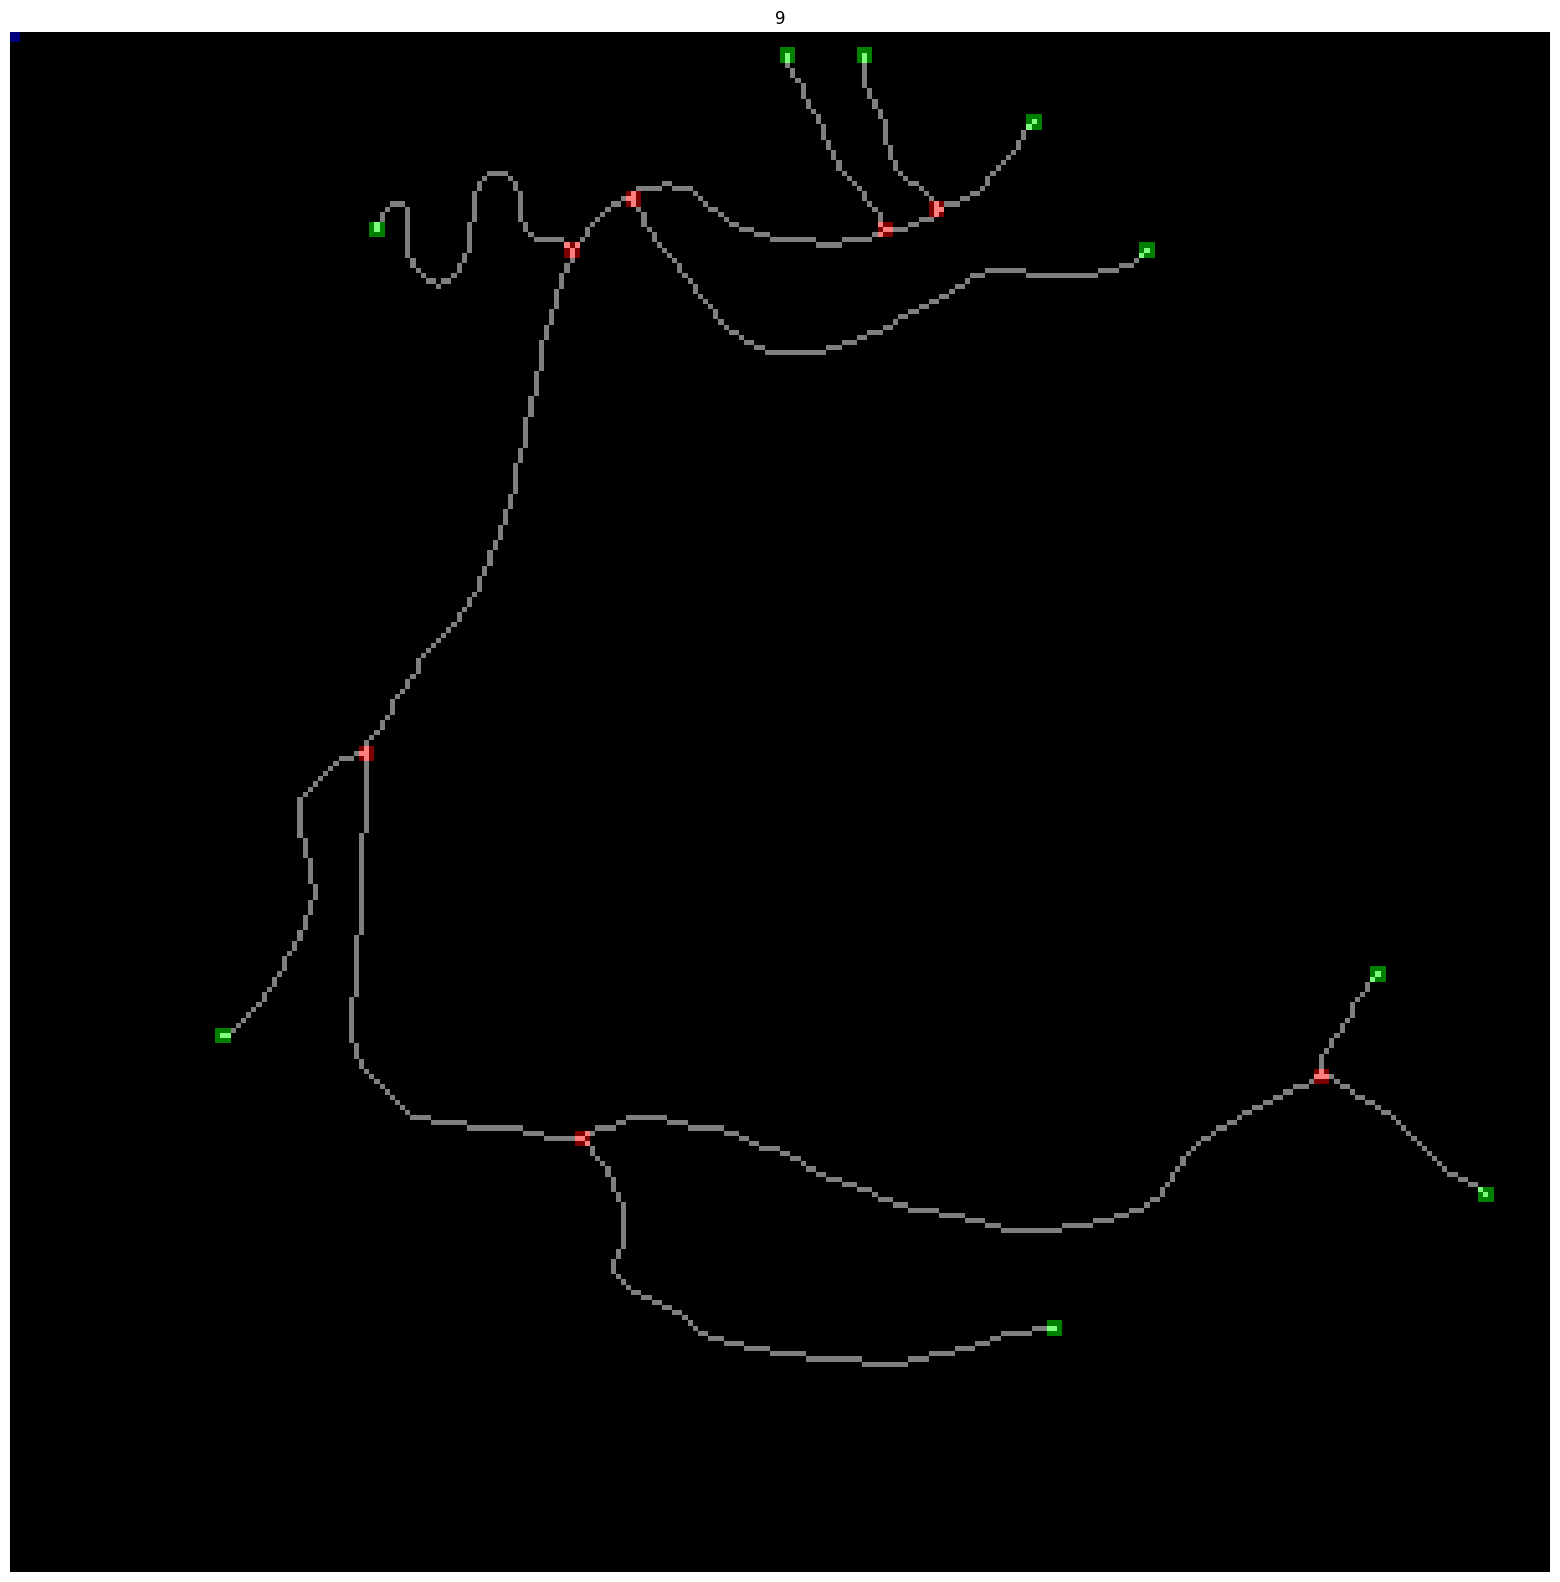

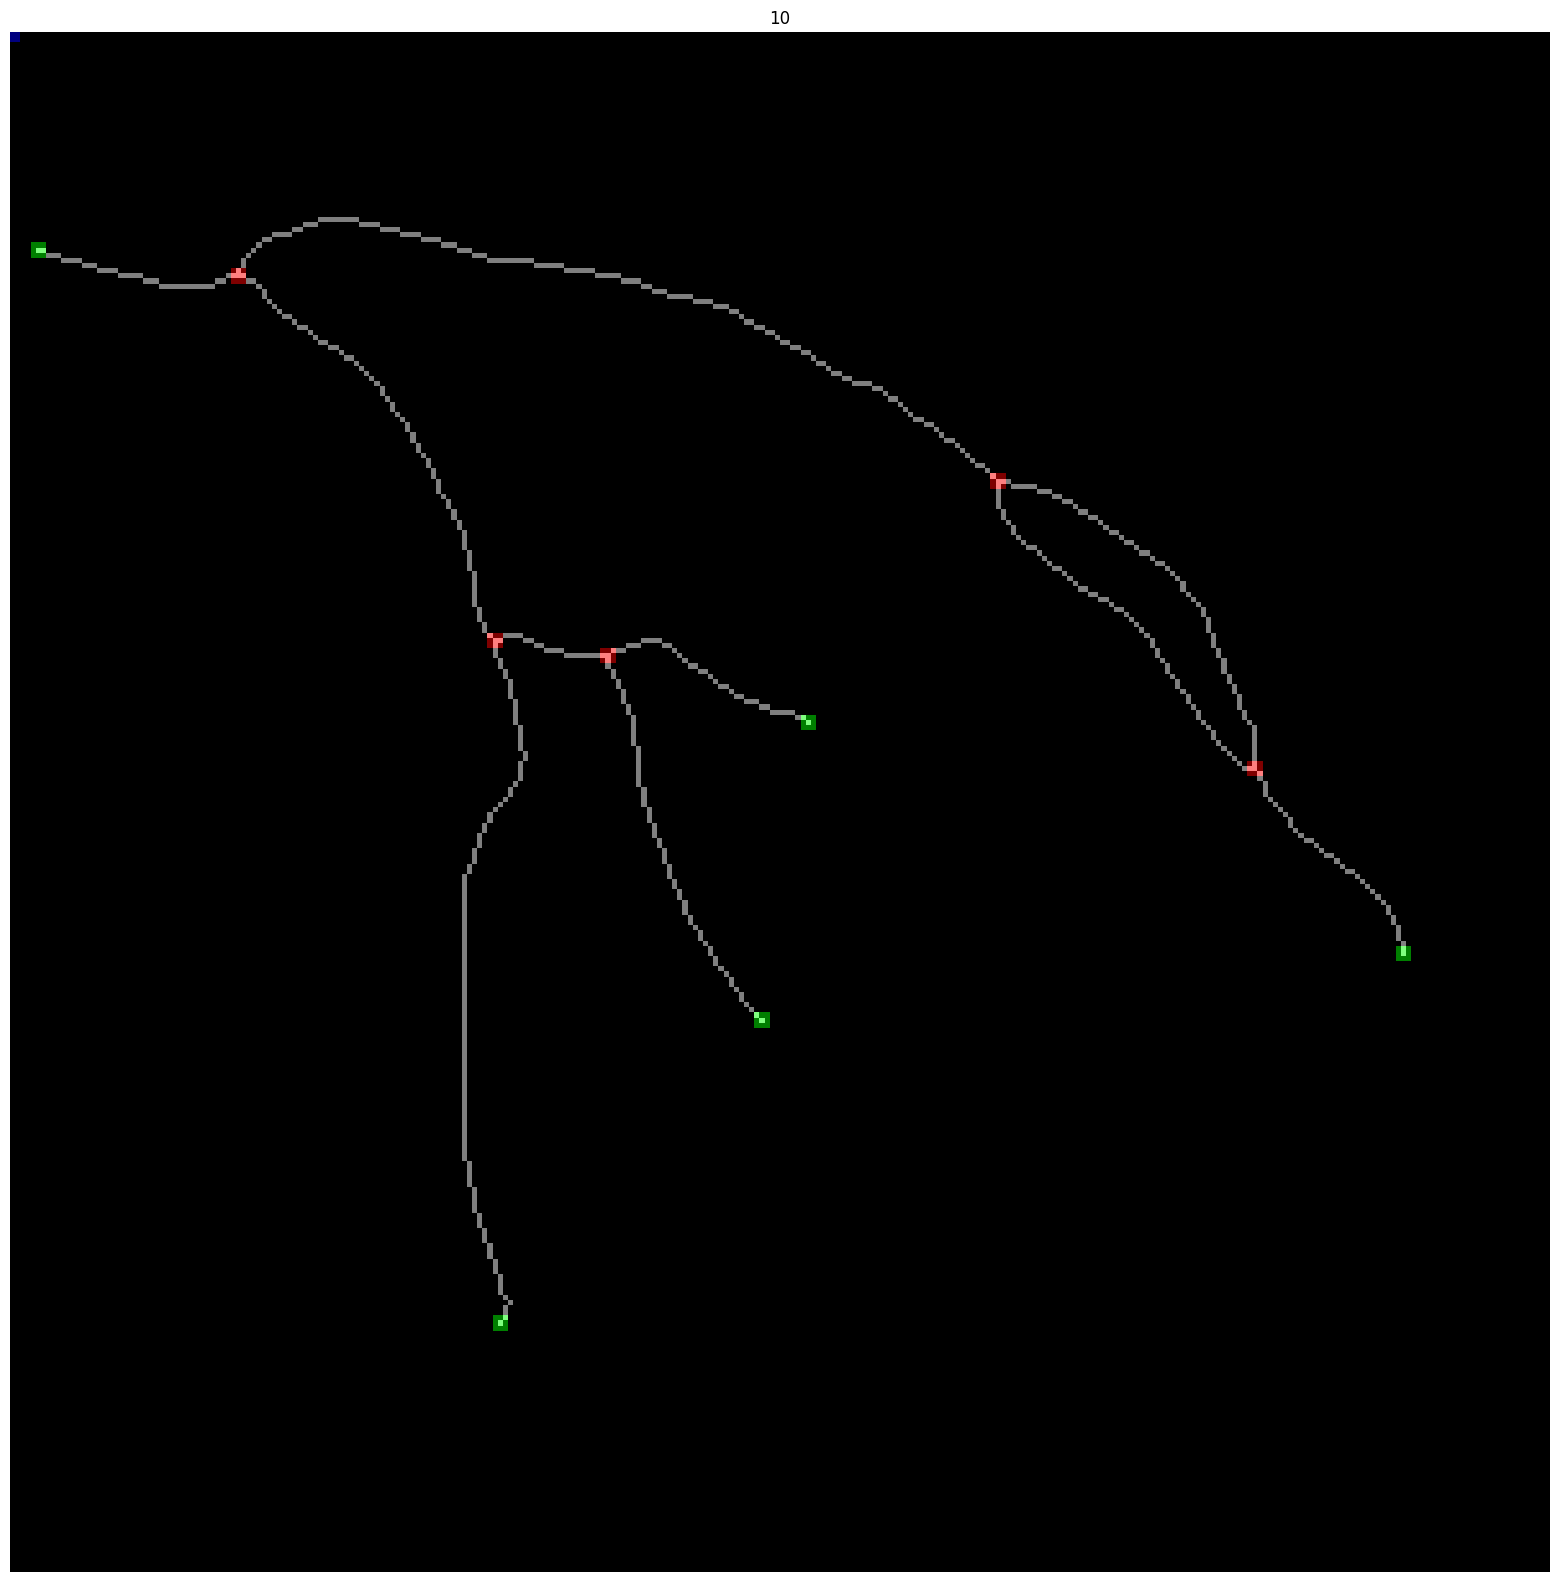

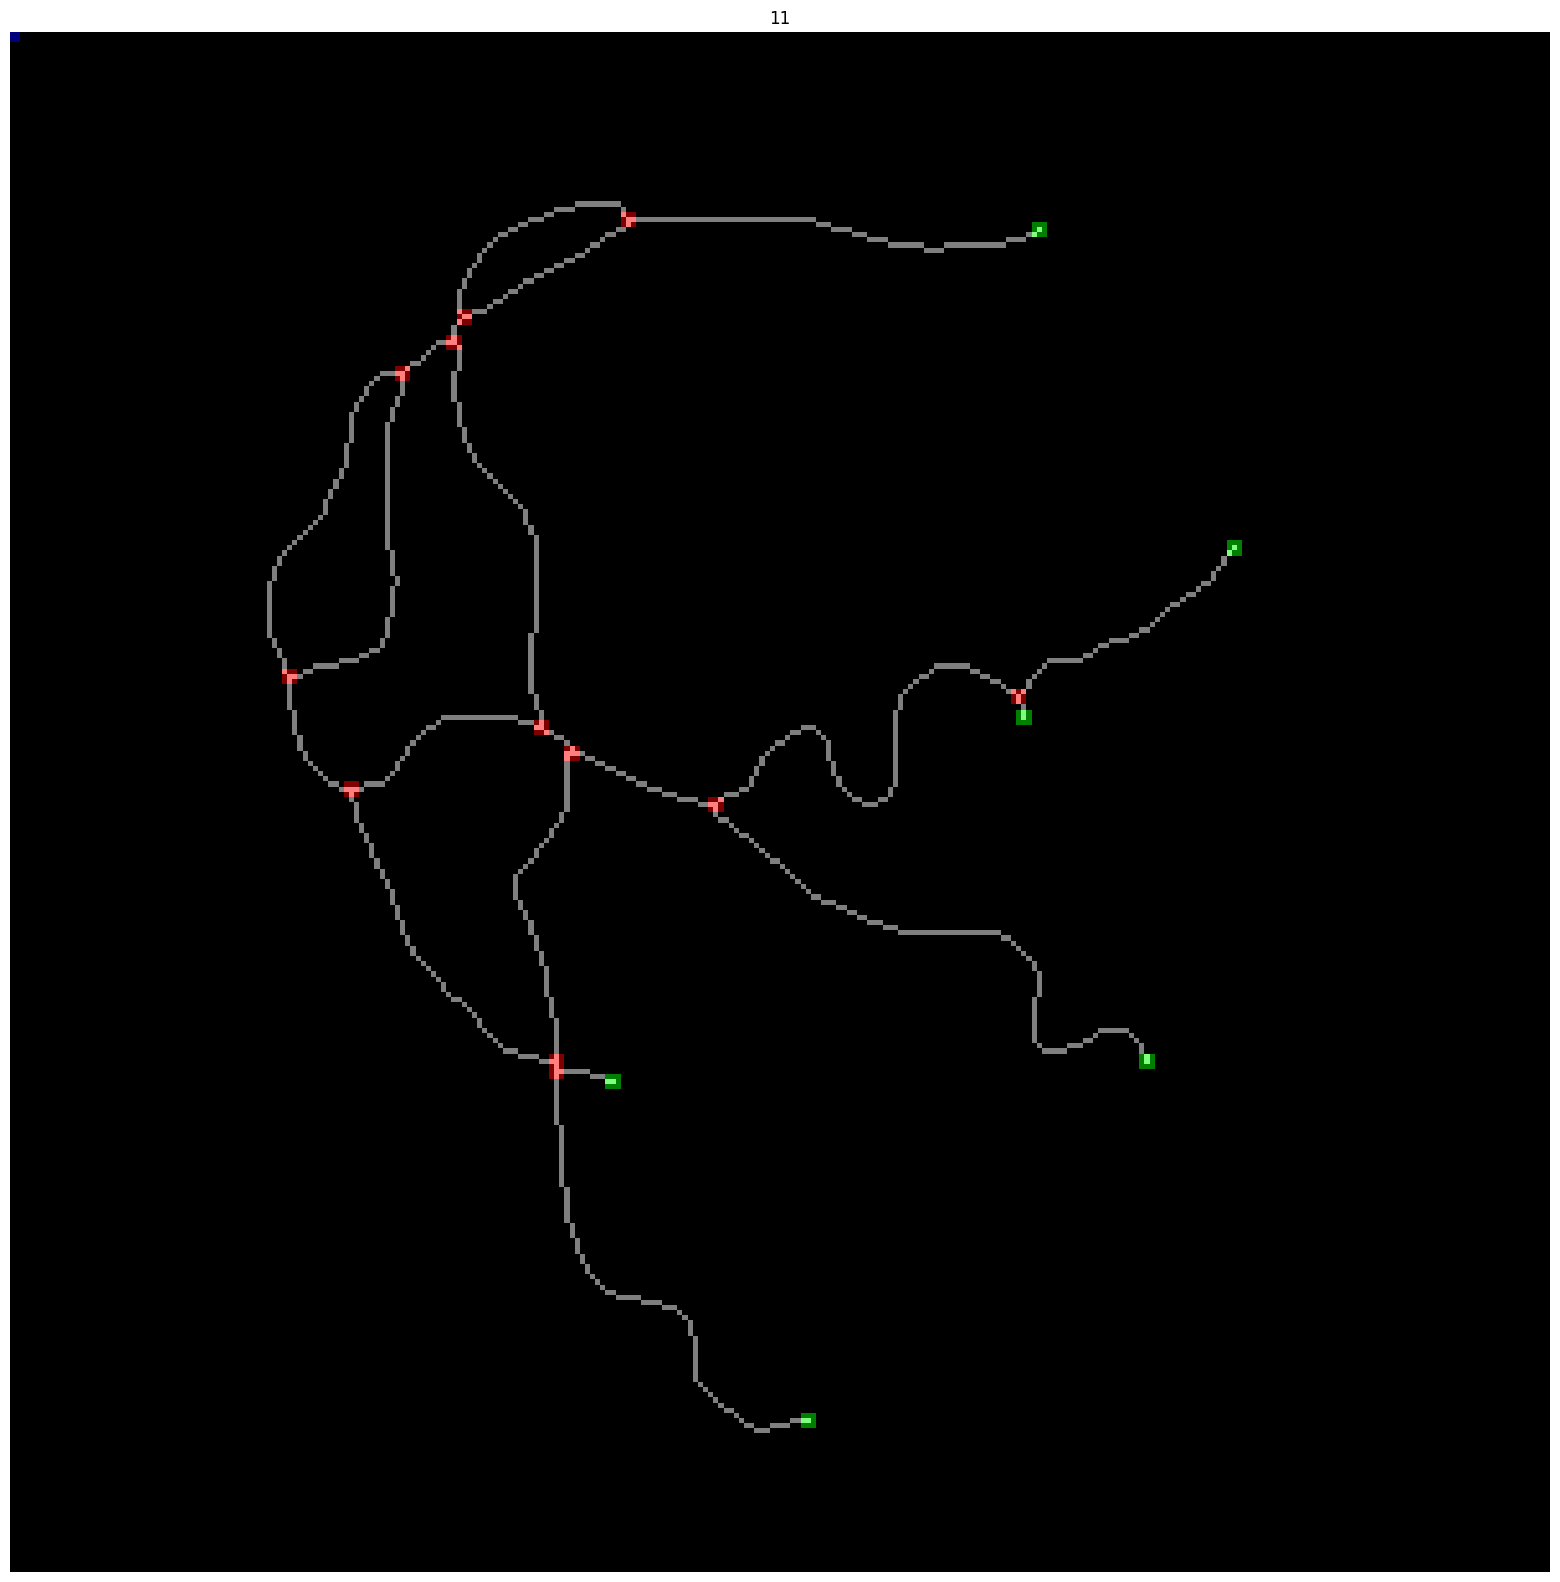

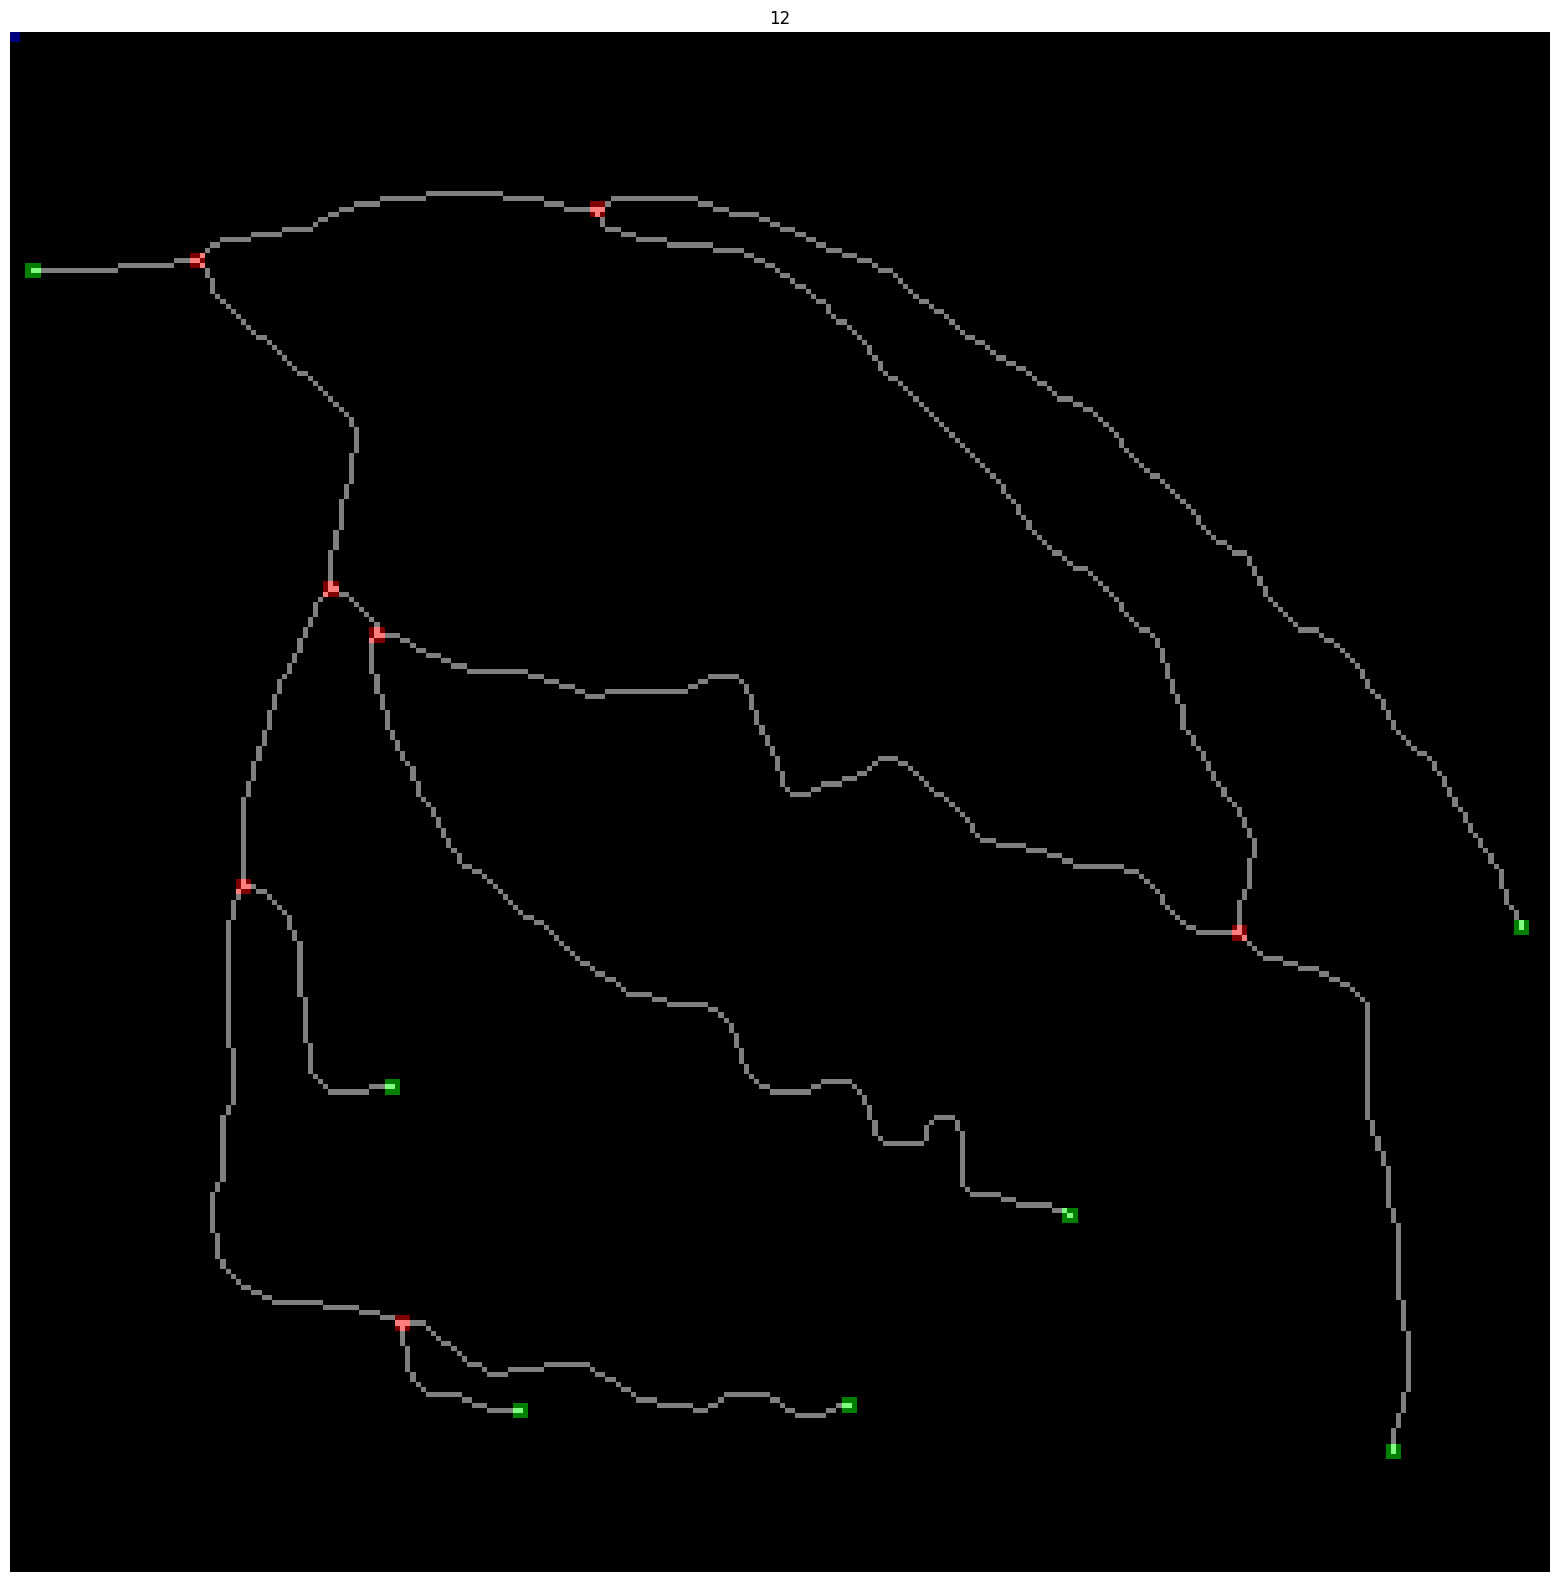

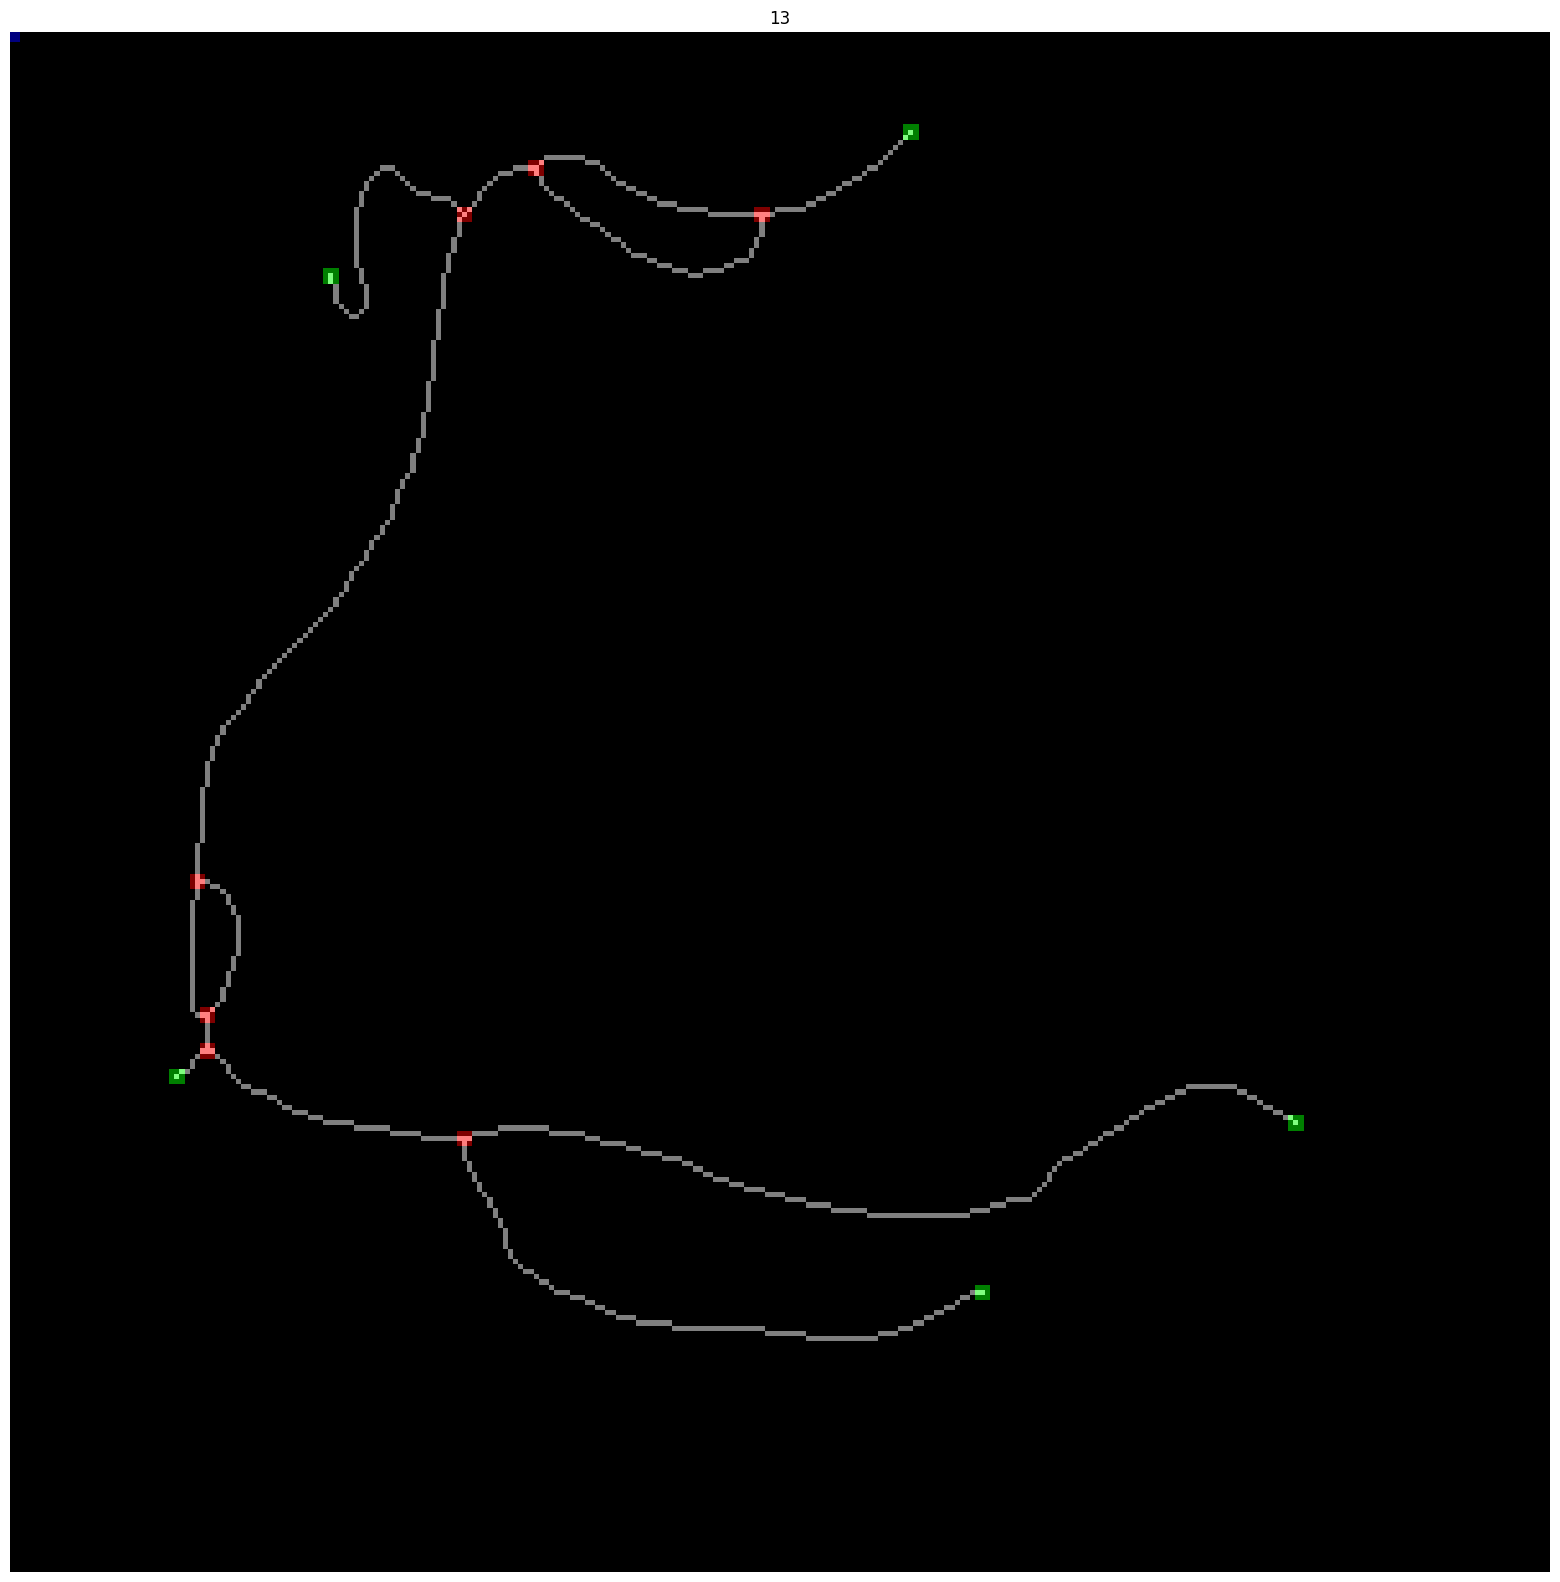

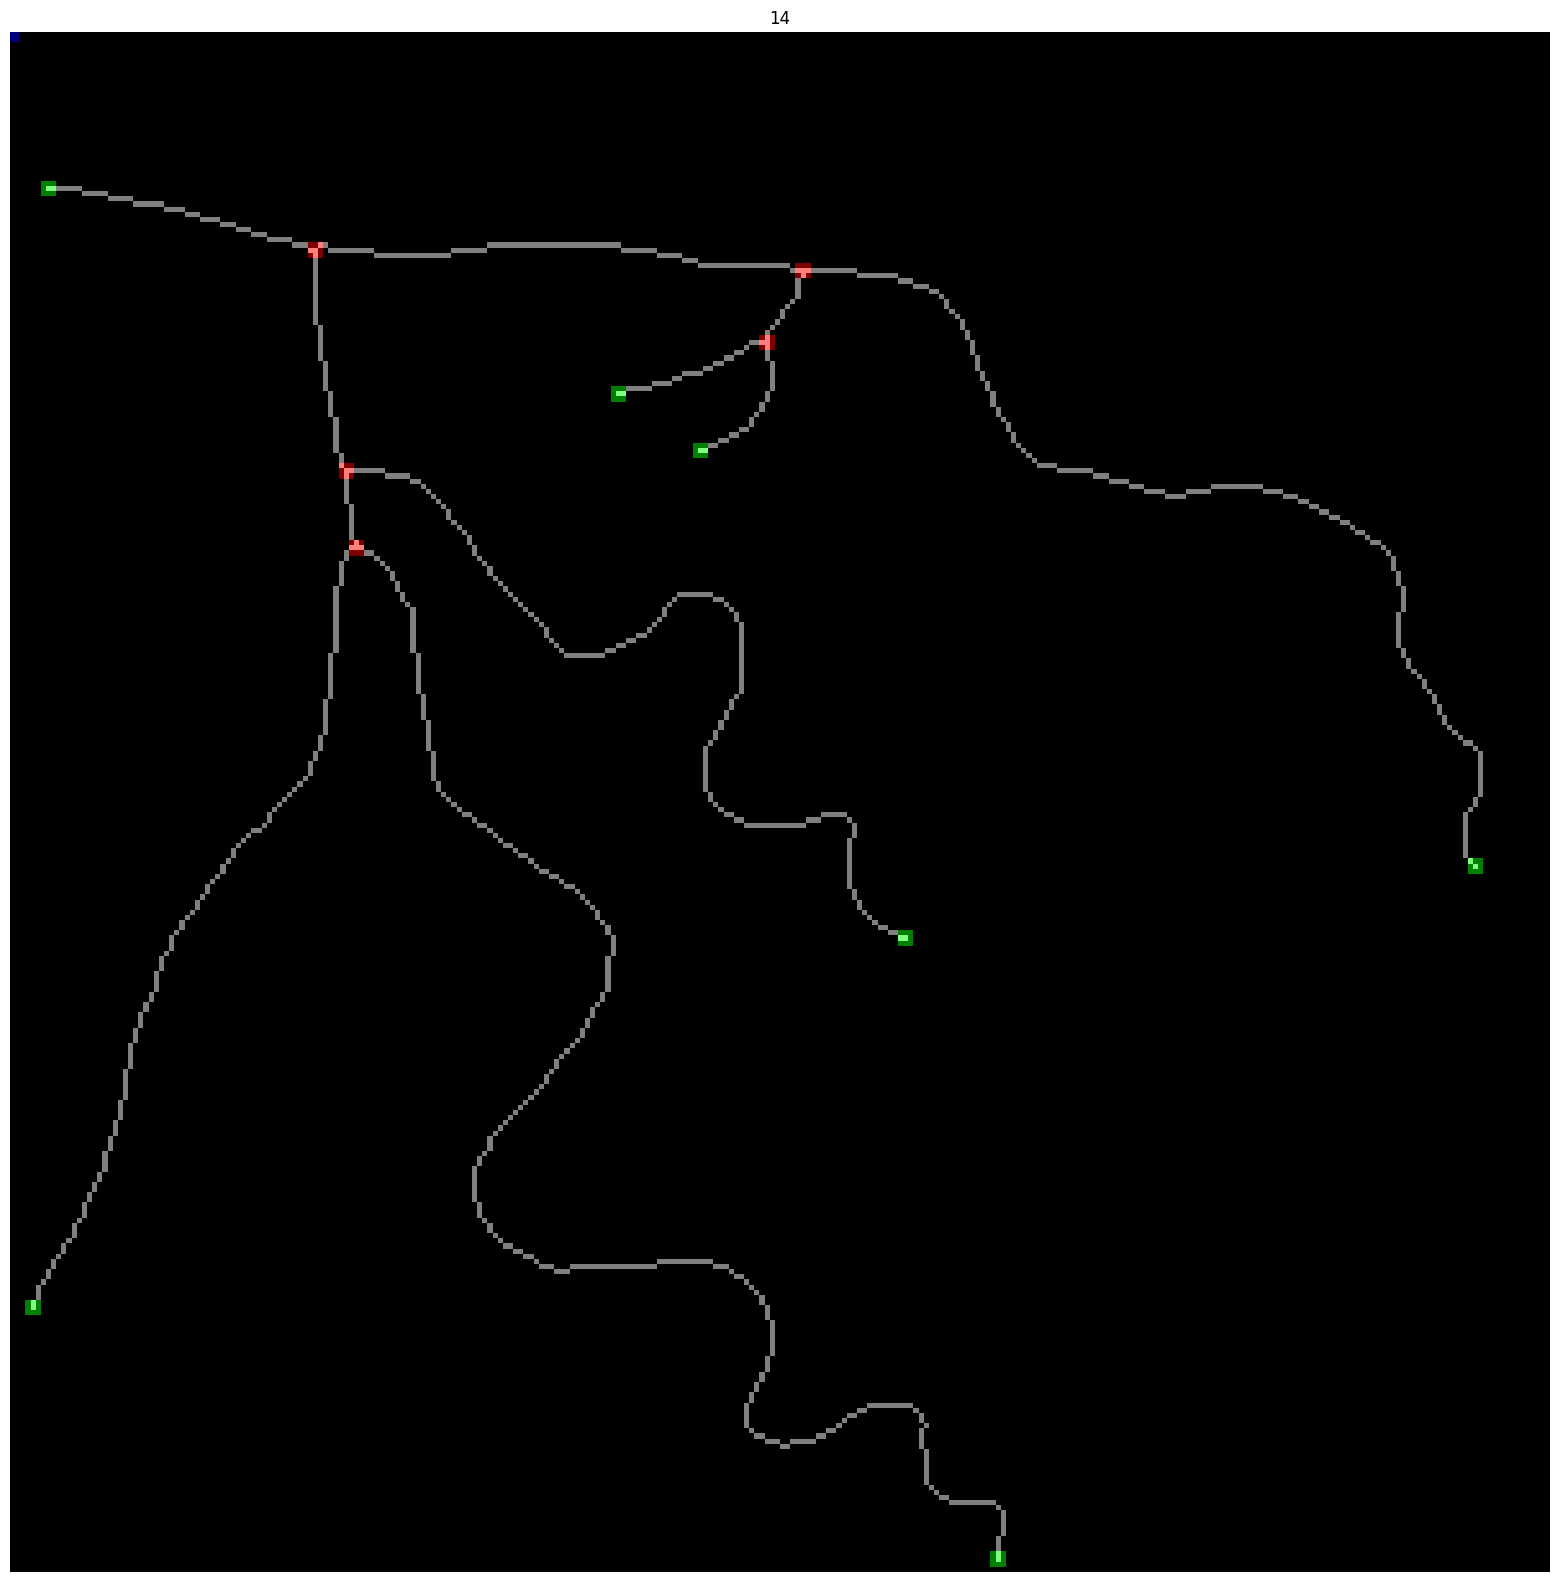

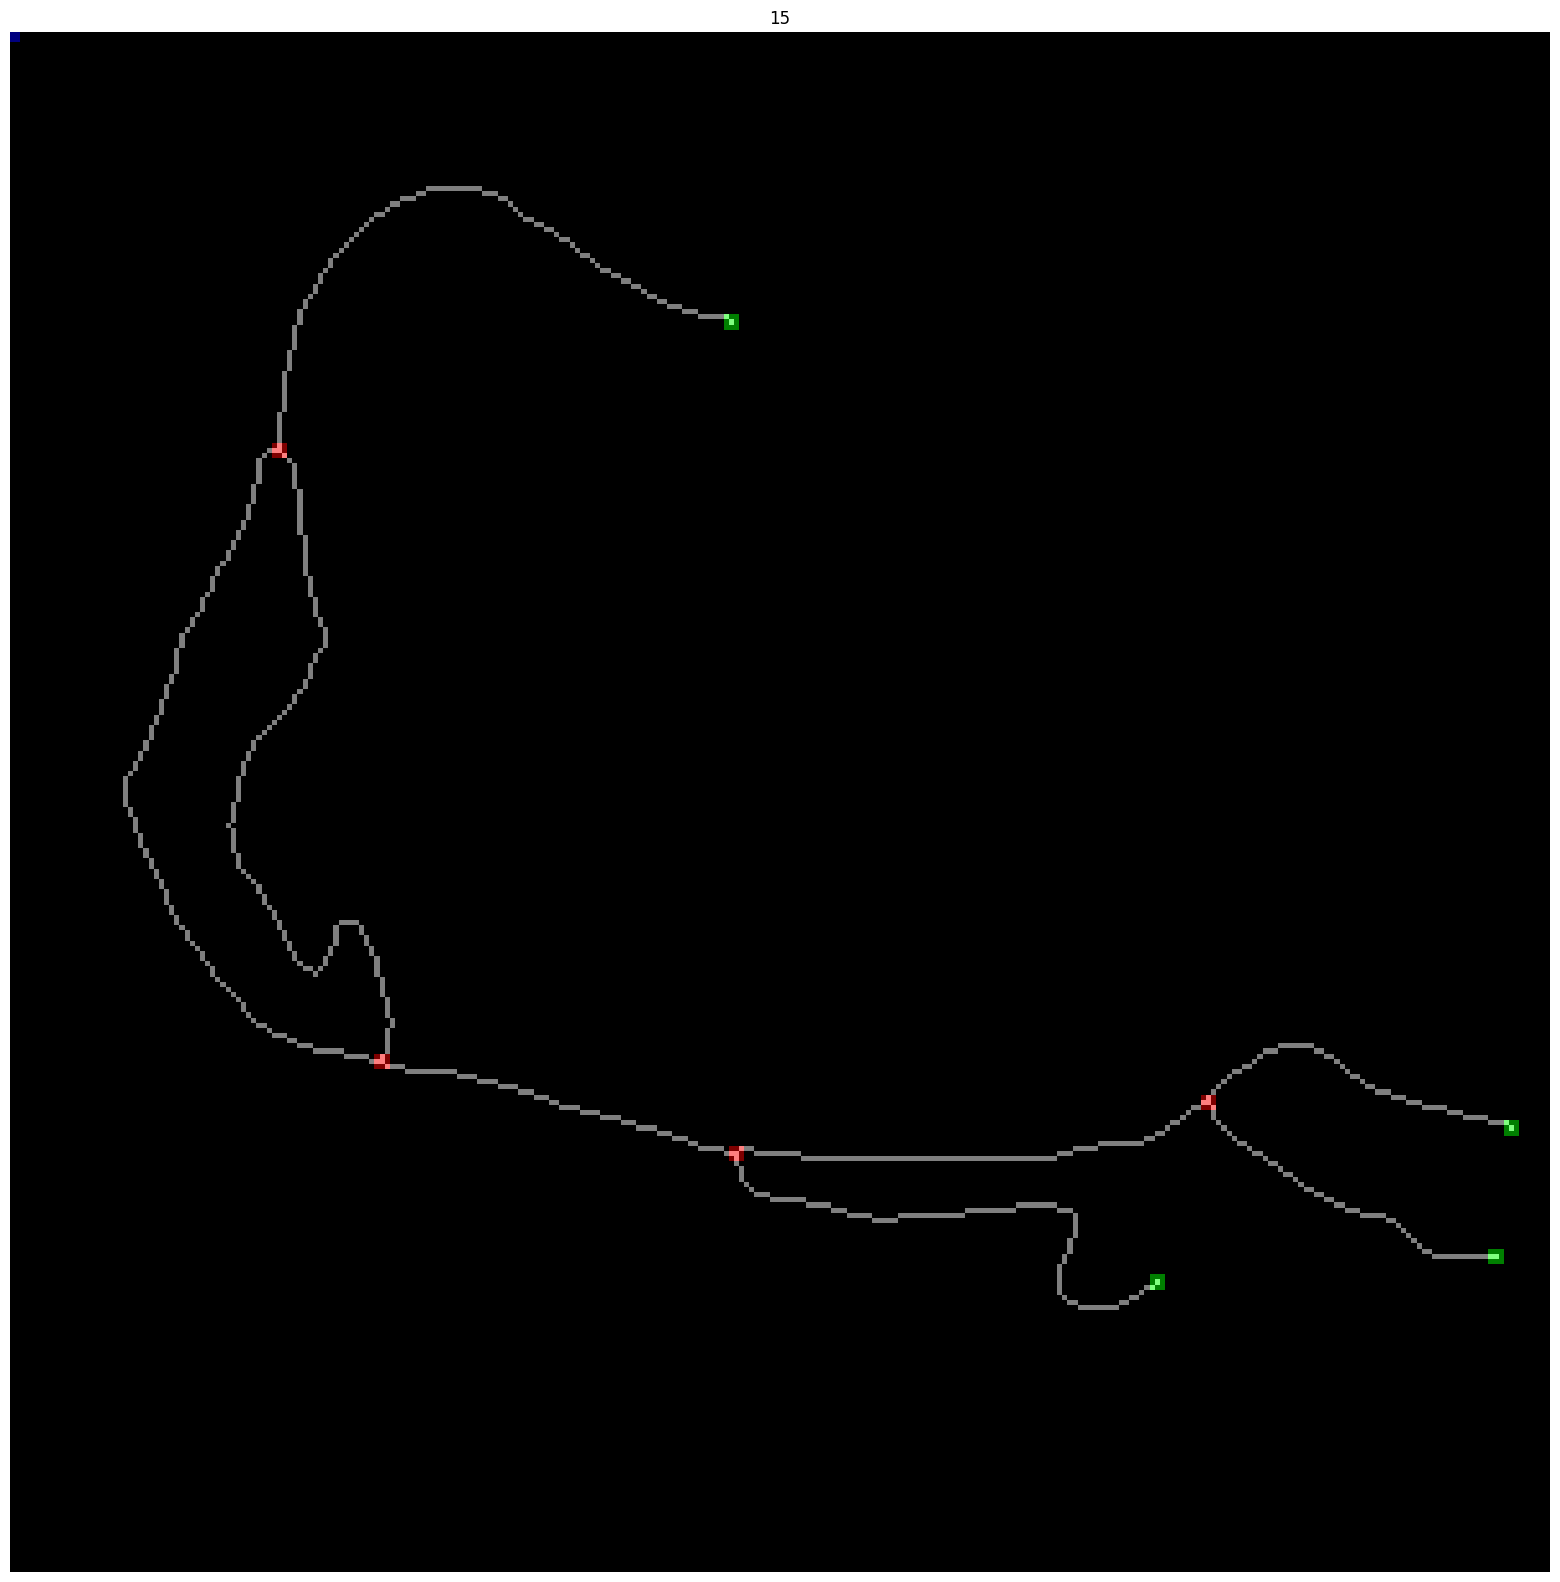

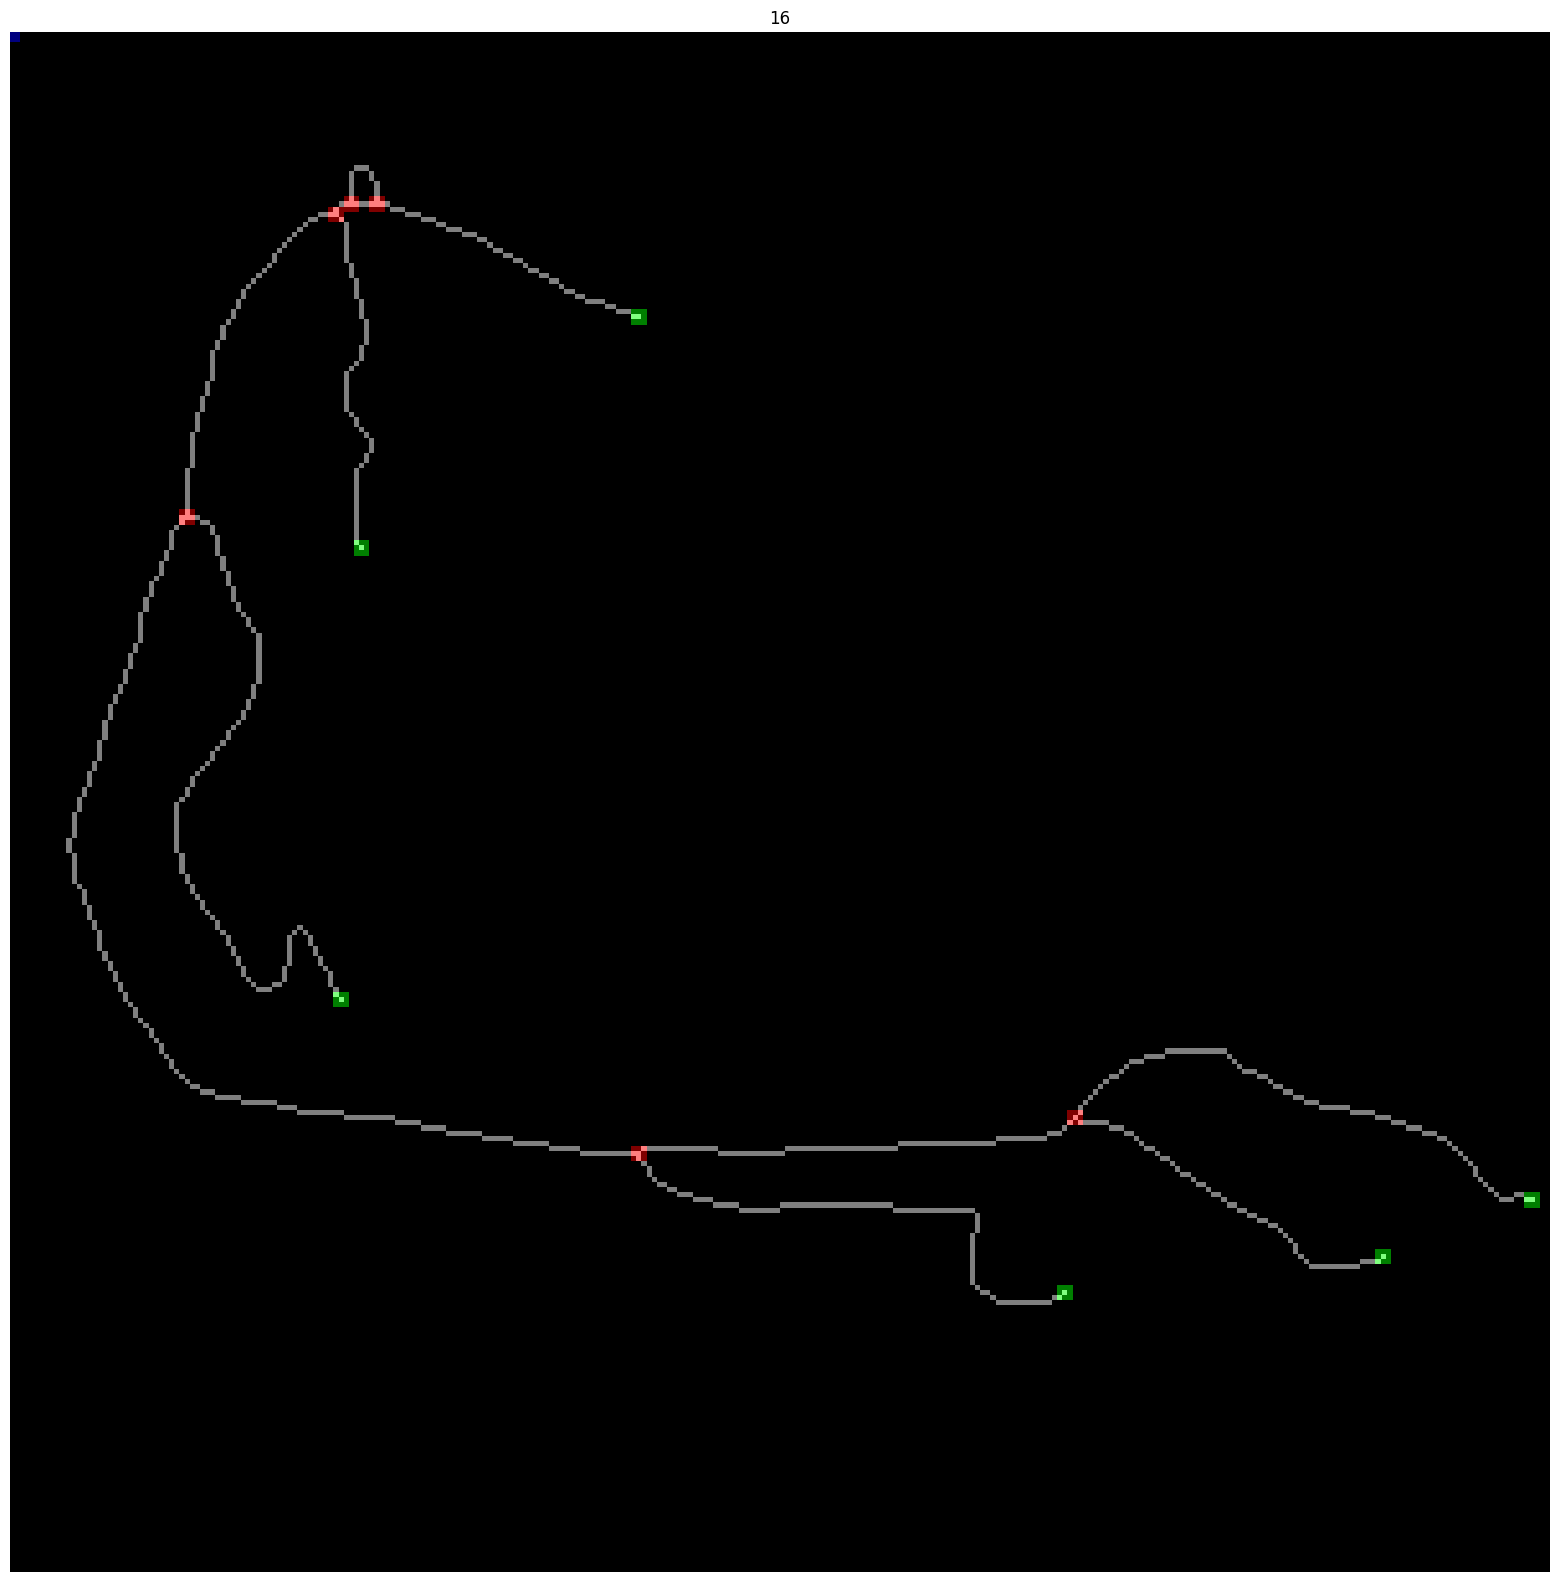

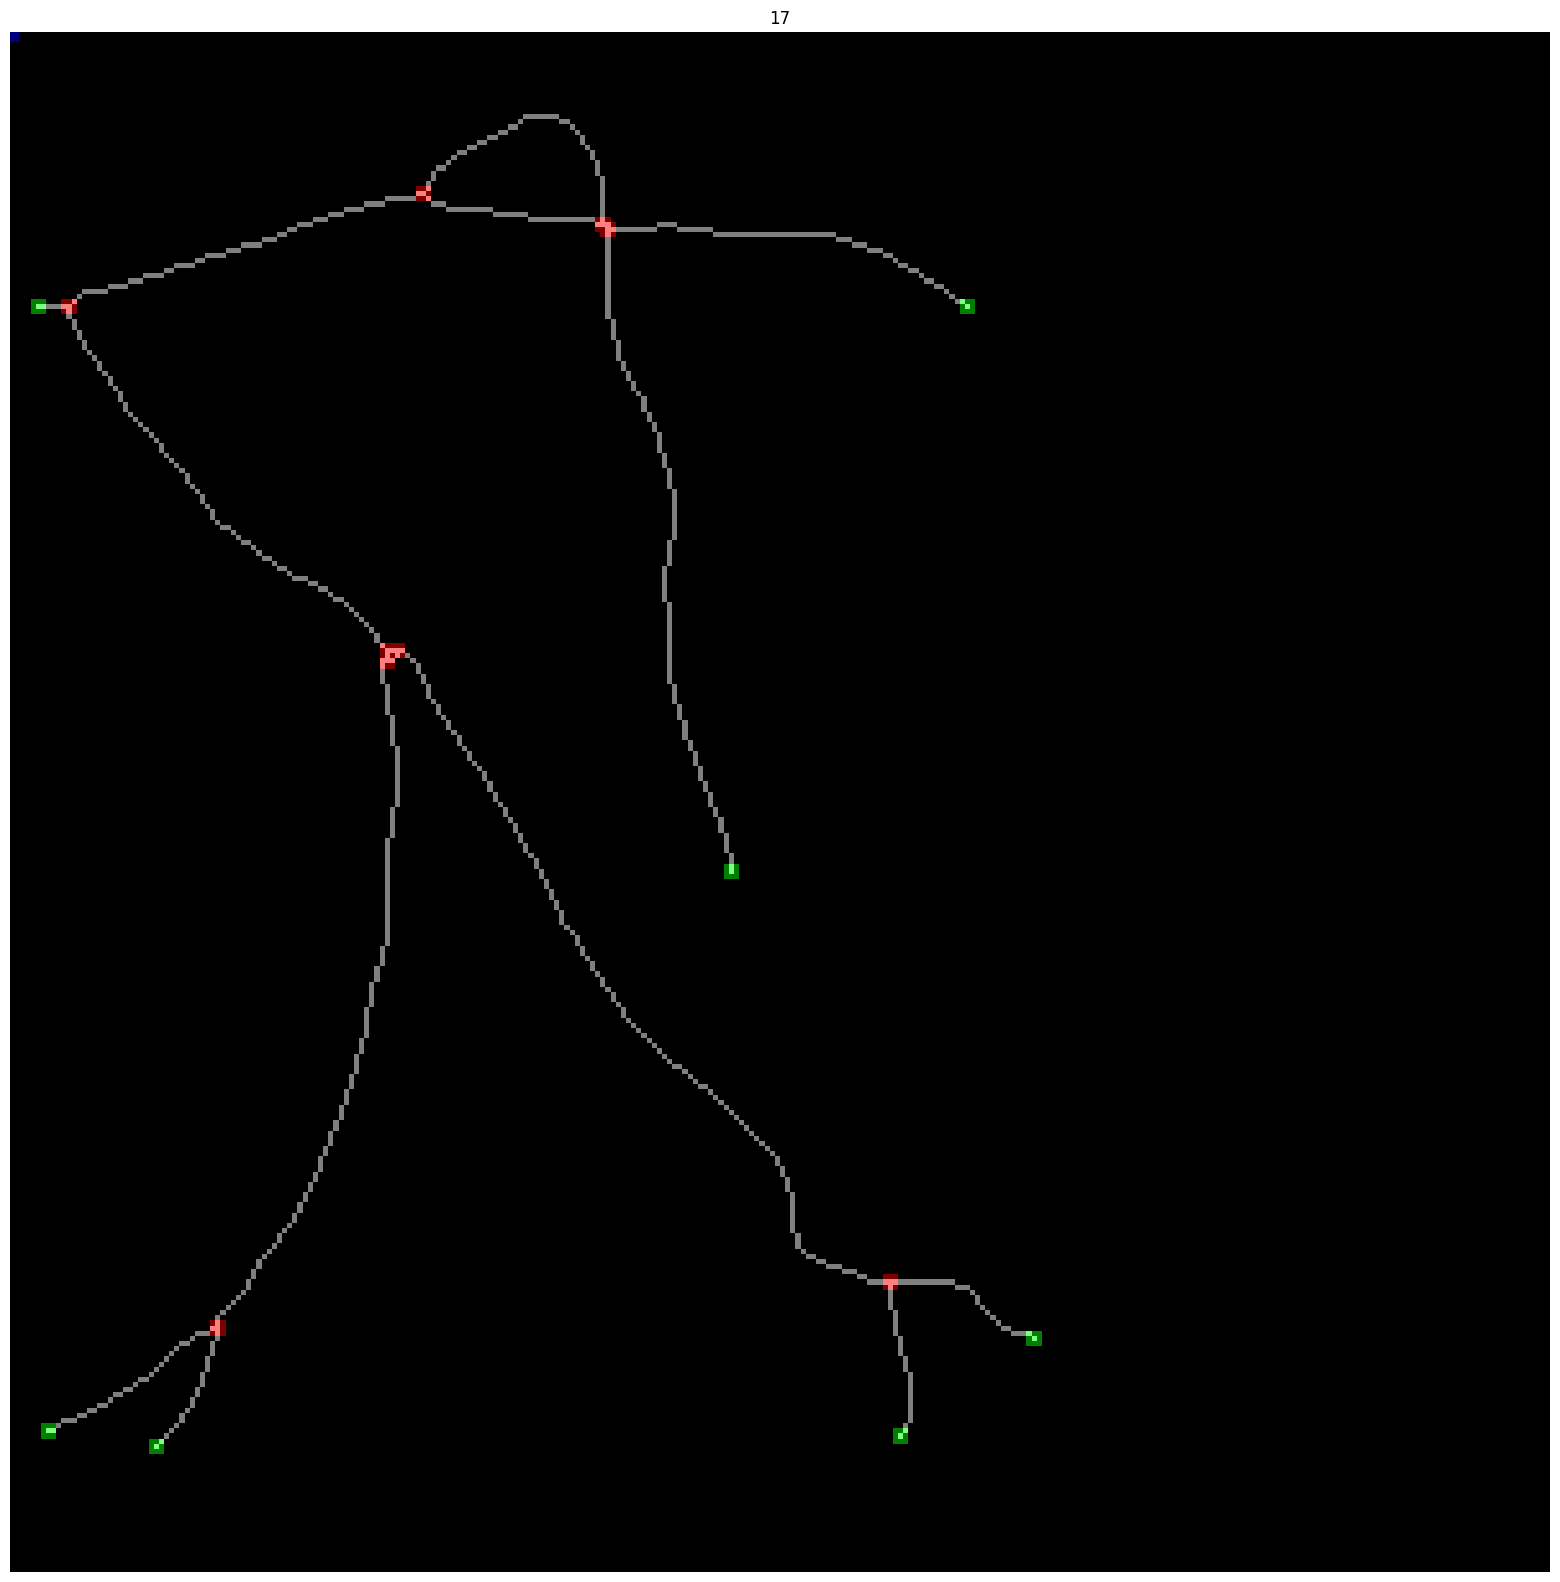

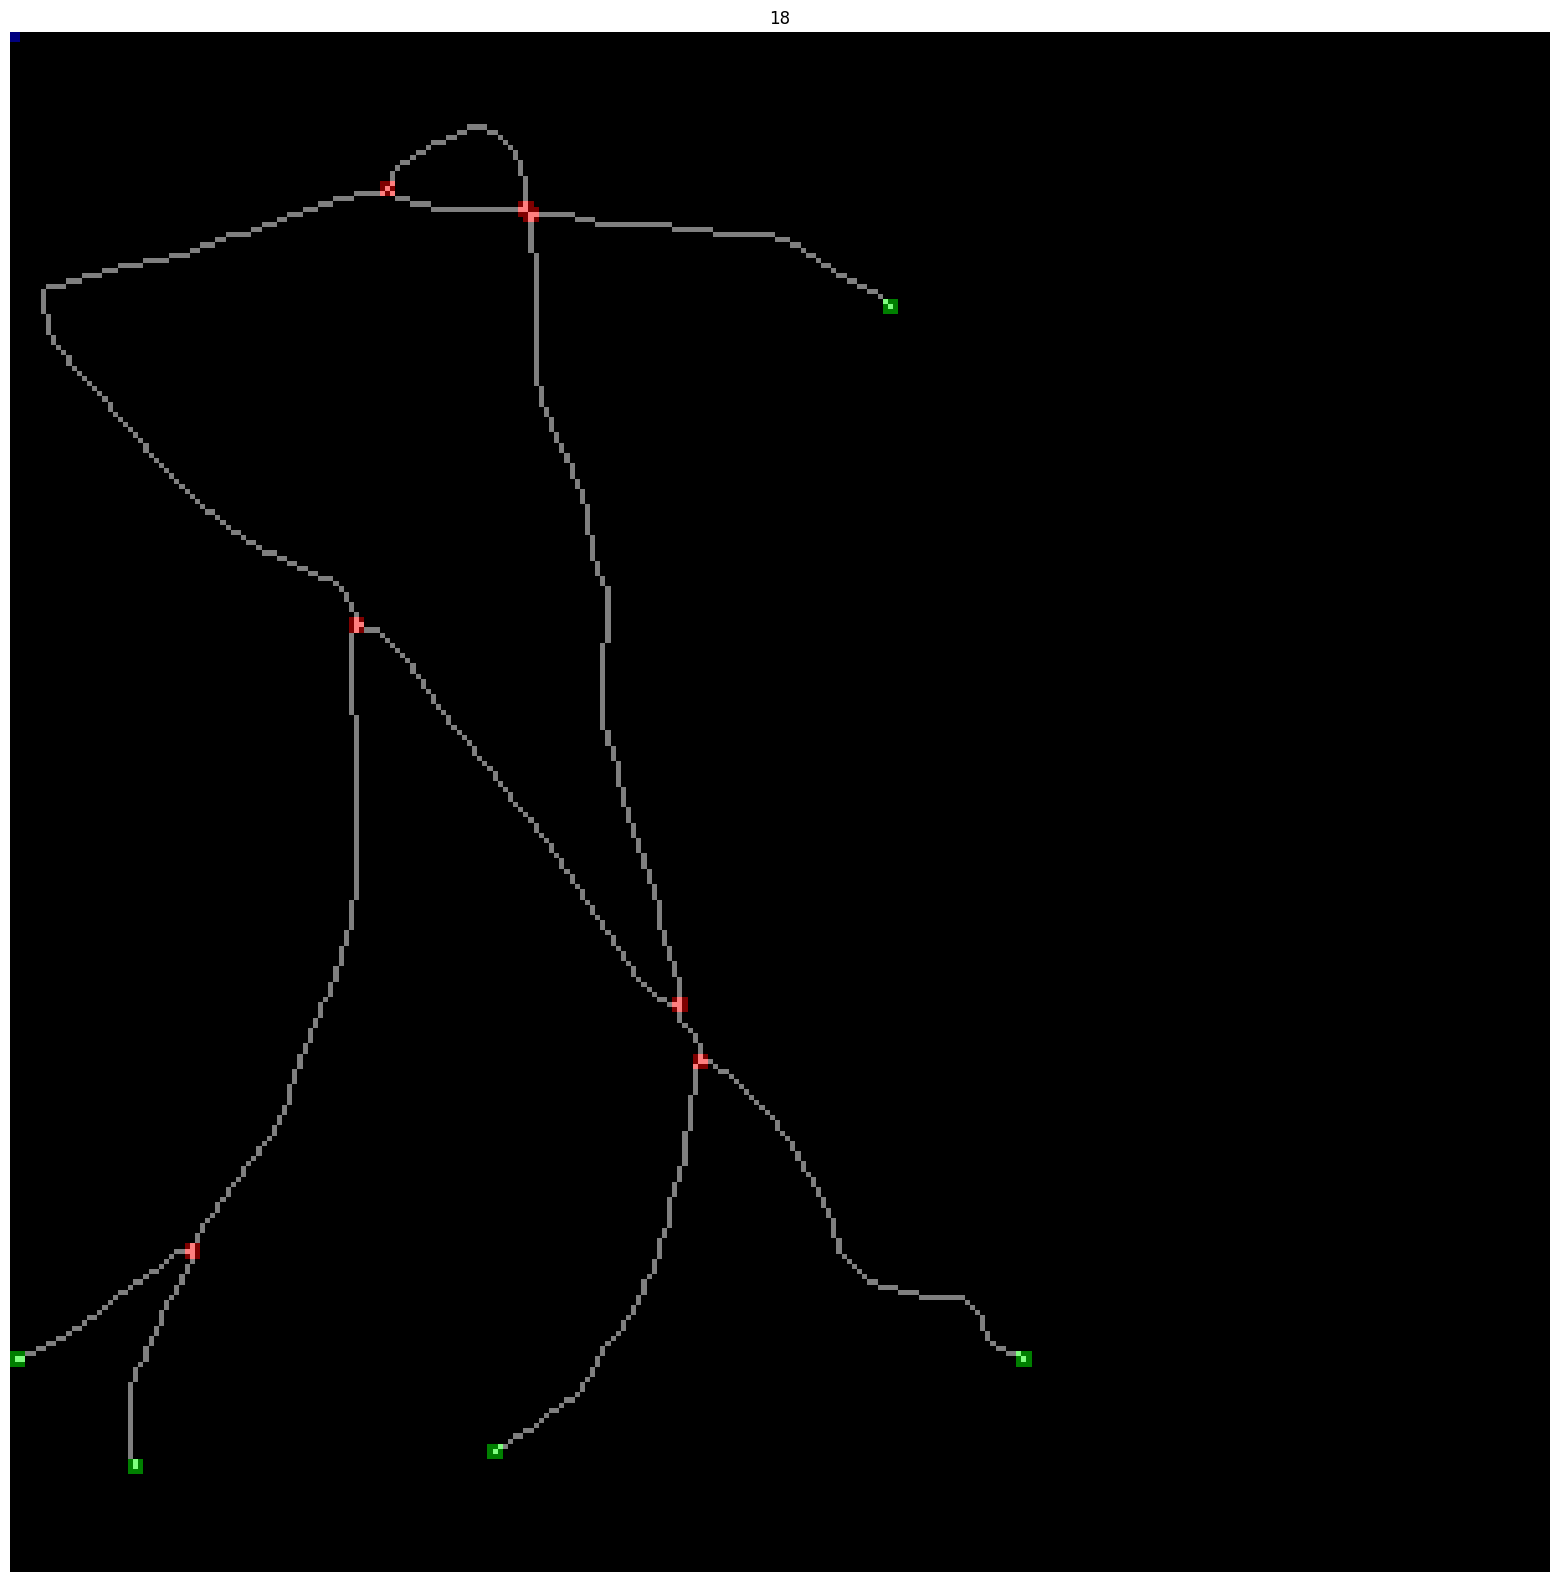

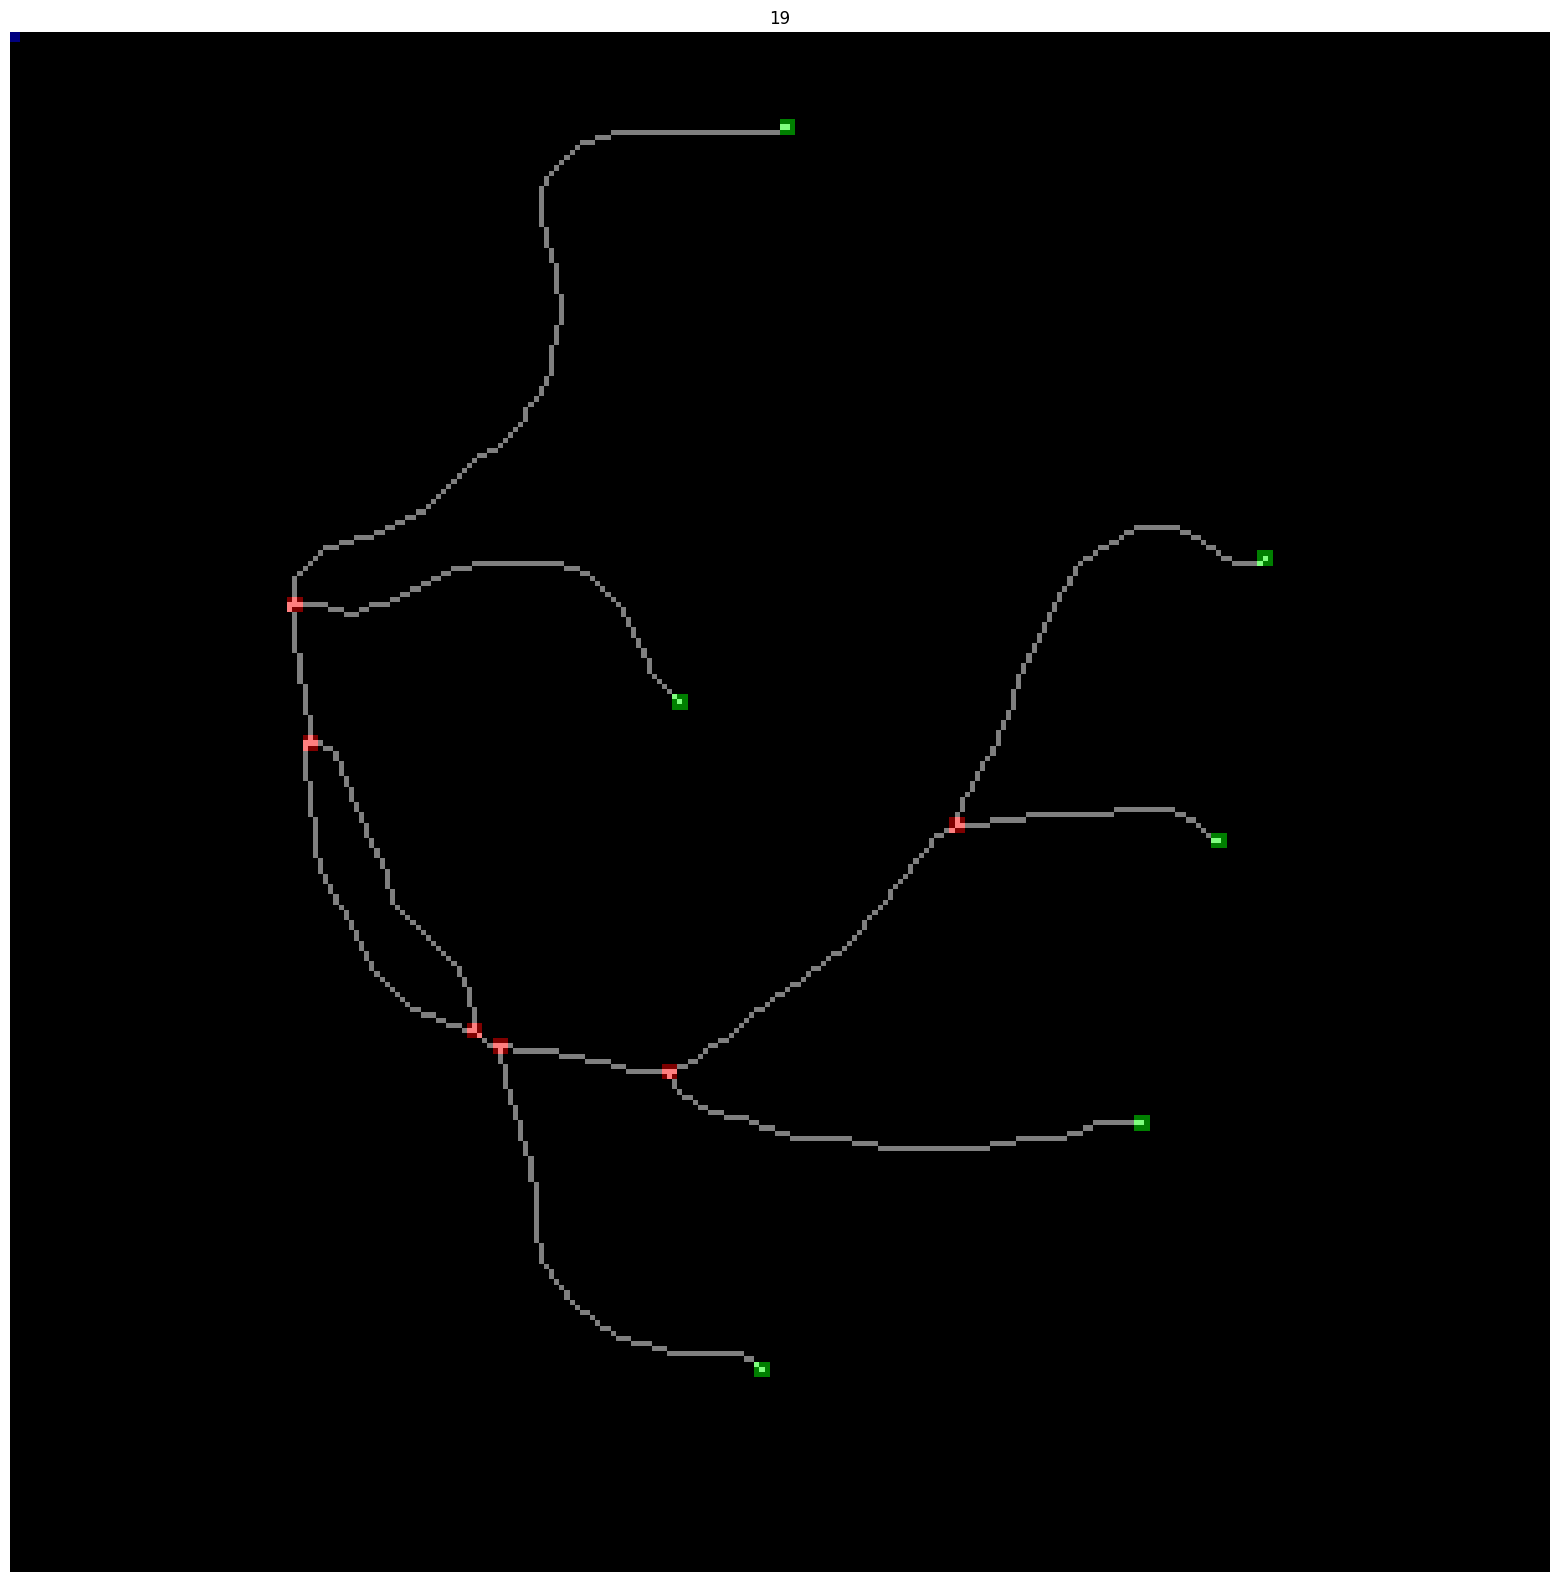

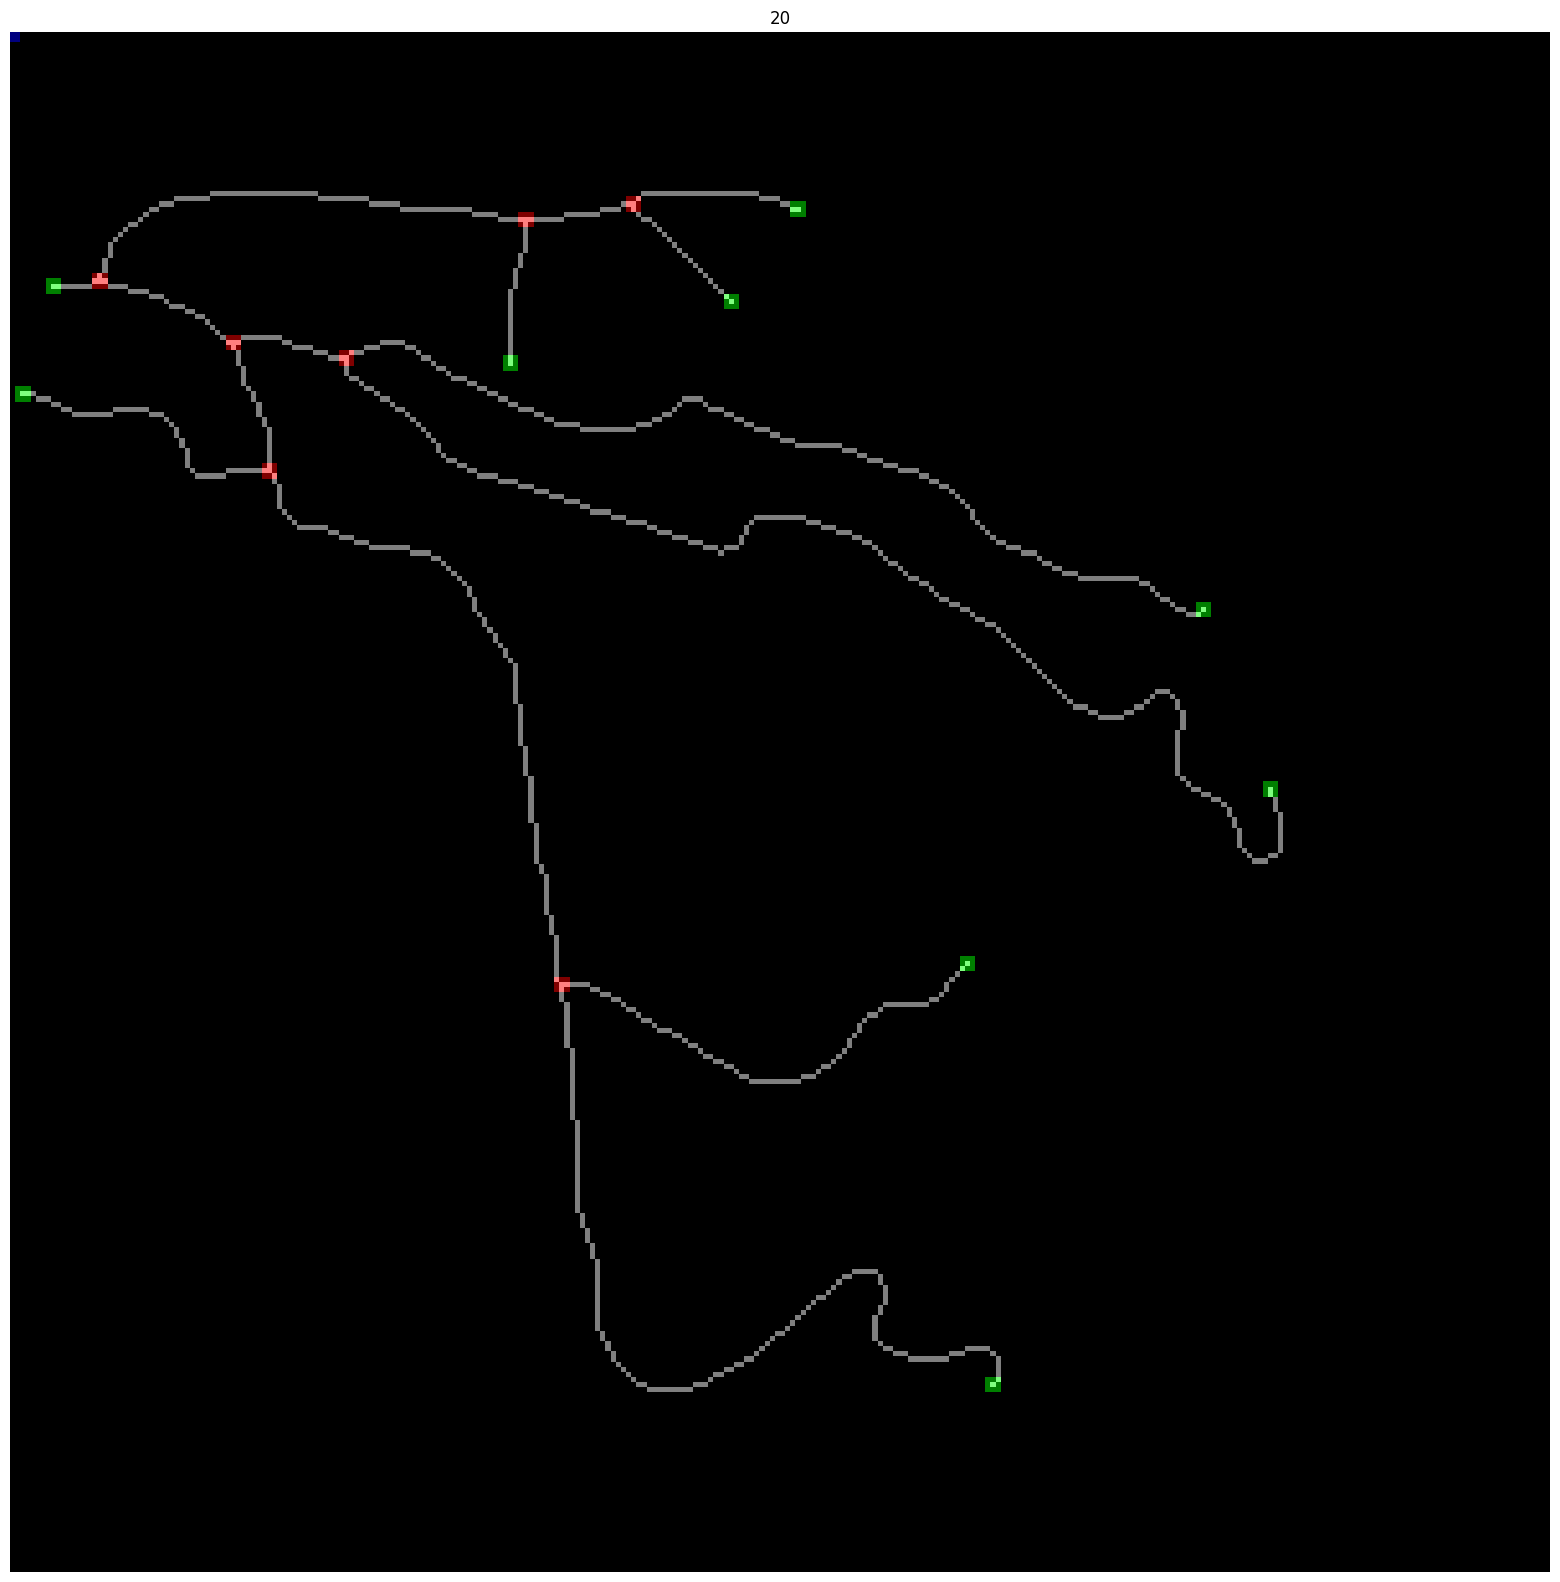

In [16]:
for i in range(1,21):
    I = plt.imread(f'database/{i}_gt.pgm')
    I = I/255
    #I = (ski.color.rgb2gray(I* 255)).astype(np.uint8)
    T = skeletonize(I)
    # Supongamos que R, G y B son imágenes en escala de grises con el mismo tamaño
    R0 = detector(T,S1) + detector(T,S2) + detector(T,S3) + detector(T,S4) # Canal Rojo
    G0 = detector(T,S1f) + detector(T,S2f)    # Canal Verde
    B0 = detector(T,S1t) + detector(T,S2t) + detector(T,S3t) + detector(T,S4t) + detector(T,S5t) # Canal Azul
    # colocar puntos
    R = mo.dilation(R0, se3) 
    G = mo.dilation(G0, se3) 
    B = mo.dilation(B0, se3) 
    # Normalizar a rango [0,1] si es necesario
    R = R / np.max(R)
    G = G / np.max(G)
    #B = B / np.max(B)
    if np.max(B) > 1:
        B = B / np.max(B)
    R = (R+T) /2
    G = (G+T) /2
    B = (B+T) /2
    # Combinar los 3 canales en una imagen RGB
    RGB_image = np.stack((R, G, B), axis=-1)  # Shape: (100, 100, 3)
    
    # Mostrar la imagen resultante
    plt.figure(figsize=(20,20))
    plt.title(i)
    plt.imshow(RGB_image)
    plt.axis("off")  # Ocultar ejes
    plt.show()